# create row image csv

In [3]:
# import os
# import csv

# def create_csv(image_folder, csv_file_path):
#     # CSV header
#     fieldnames = ['HospitalID', 'PatientID', 'ImageID', 'ImagePath', 'Label']
    
#     # open the CSV file in write mode
#     with open(csv_file_path, 'w', newline='') as csvfile:
#         # Create a CSV writer object and write the header
#         writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#         writer.writeheader()

#         for filename in sorted(os.listdir(image_folder)):
#             # complete image file path
#             image_path = os.path.join(image_folder, filename)

#             # filename to extract HospitalID, PatientID, image number, and image label
#             parts = filename.split('_')
#             hospital_id = parts[3]
#             patient_id = parts[1]
#             image_number = parts[6]
#             image_label = parts[4]

#             # write data into the CSV file
#             writer.writerow({
#                 'HospitalID': hospital_id,
#                 'PatientID': patient_id,
#                 'ImageID': image_number,
#                 'ImagePath': image_path,
#                 'Label': image_label
#             })

#     # created and saved
#     print("CSV file has been created and saved to:", csv_file_path)


# image_folder = "/local/data1/honzh073/data/8bit_raw"
# csv_file_path = "/local/data1/honzh073/local_repository/FL/code/0_image_statsPyradiomics/raw_imagePath.csv"
# create_csv(image_folder, csv_file_path)


CSV file has been created and saved to: /local/data1/honzh073/local_repository/FL/code/0_image_statsPyradiomics/raw_imagePath.csv


# hospital csv files
(hospital 40 is missing )

In [5]:
# import csv
# from collections import defaultdict
# import os

# def group_and_save_hospital_data(input_csv_path, output_folder):
#     hospital_data = defaultdict(list)

#     with open(input_csv_path, 'r') as csvfile:
#         reader = csv.DictReader(csvfile)
#         for row in reader:
#             hospital_id = row['HospitalID']
#             patient_id = row['PatientID']
#             hospital_data[hospital_id].append(row)

#     # Save grouped hospital data into individual CSV files
#     for hospital_id, data in hospital_data.items():
#         output_file_path = os.path.join(output_folder, f'hospital{hospital_id}.csv')
#         with open(output_file_path, 'w', newline='') as csvfile:
#             fieldnames = data[0].keys()
#             writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#             writer.writeheader()
#             writer.writerows(data)


# # Input and output paths
# input_csv_path = '/local/data1/honzh073/local_repository/FL/code/0_image_statsPyradiomics/raw_imagePath.csv'
# output_folder = '/local/data1/honzh073/local_repository/FL/code/0_image_statsPyradiomics/hospitalCSV'

# # Group and save hospital data
# group_and_save_hospital_data(input_csv_path, output_folder)

# print("Grouped and saved hospital data into individual CSV files.")



Grouped and saved hospital data into individual CSV files.


# copy raw image
mkdir hospital22 hospital18... files under /local/data1/honzh073/data/ first

In [3]:
# import pandas as pd
# import shutil
# import os
# # hospital 18
# # csv_file_path = "/local/data1/honzh/local_repository/FL/code/0_stats_pyradiomics/single_hospital_csv/hospital18.csv"

# # hospital 22
# # csv_file_path = "/local/data1/honzh/local_repository/FL/code/0_stats_pyradiomics/single_hospital_csv/hospital22.csv"

# # hospital 43
# # csv_file_path = "/local/data1/honzh/local_repository/FL/code/0_stats_pyradiomics/single_hospital_csv/hospital43.csv"

# # hospital 45
# csv_file_path = "/local/data1/honzh/local_repository/FL/code/0_stats_pyradiomics/single_hospital_csv/hospital45.csv"

# # hospital 55
# # csv_file_path = "/local/data1/honzh/local_repository/FL/code/0_stats_pyradiomics/single_hospital_csv/hospital55.csv"


# # Destination folder to copy images
# # destination_folder = "/local/data1/honzh073/data/hospital18"
# # destination_folder = "/local/data1/honzh073/data/hospital22"
# # destination_folder = "/local/data1/honzh073/data/hospital43"
# destination_folder = "/local/data1/honzh073/data/hospital45"
# # destination_folder = "/local/data1/honzh073/data/hospital55"

# # Read image paths from the CSV file using pandas
# data = pd.read_csv(csv_file_path)

# # Iterate through rows and copy images to the destination folder
# for index, row in data.iterrows():
#     image_path = row["ImagePath"]  # Assuming this column contains the file paths to the images
    
#     # Check if the source image file exists
#     if os.path.exists(image_path):
#         # Extract the image file name from the path
#         image_filename = os.path.basename(image_path)
        
#         # Construct the destination path by joining the destination folder and the image file name
#         destination_path = os.path.join(destination_folder, image_filename)
        
#         # Copy the image file to the destination folder
#         shutil.copy(image_path, destination_path)

# print("Image copying completed.")


Image copying completed.


since we have copied all the images from raw image folder

we can extract features from the image folder



# 5 hospitals pixel density distribution
pixel density distribution

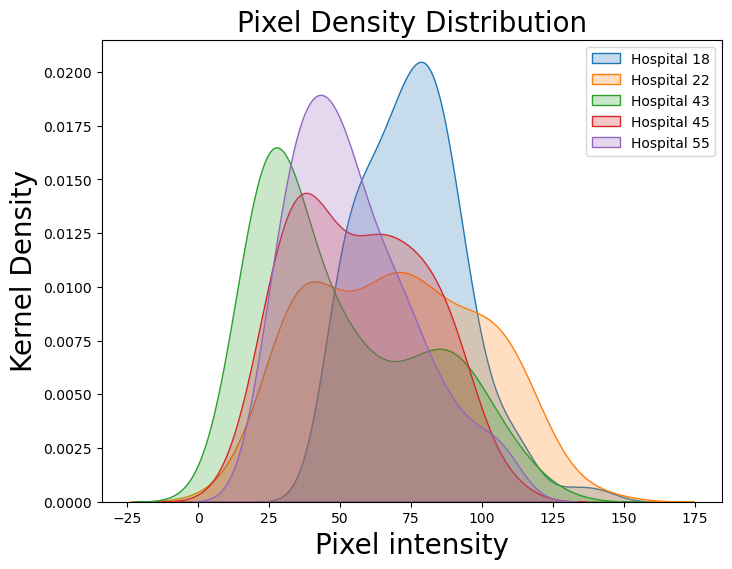

In [3]:
import pandas as pd
import SimpleITK as sitk
import seaborn as sns
import matplotlib.pyplot as plt

# CSV file paths
# csv_file_paths = [
#     "/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/csvFiles/hospital18.csv",
#     "/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/csvFiles/hospital43.csv",
#     "/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/csvFiles/hospital55.csv",
# ]

csv_file_paths = [
    "/local/data1/honzh/local_repository/FL/code/0_stats_pyradiomics/single_hospital_csv/hospital18.csv",
    "/local/data1/honzh/local_repository/FL/code/0_stats_pyradiomics/single_hospital_csv/hospital22.csv",
    "/local/data1/honzh/local_repository/FL/code/0_stats_pyradiomics/single_hospital_csv/hospital43.csv",
    "/local/data1/honzh/local_repository/FL/code/0_stats_pyradiomics/single_hospital_csv/hospital45.csv",
    "/local/data1/honzh/local_repository/FL/code/0_stats_pyradiomics/single_hospital_csv/hospital55.csv"

]
# Define colors
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
custom_labels = ['Hospital 18','Hospital 22', 'Hospital 43', 'Hospital 45','Hospital 55']

# Create the figure and axis
plt.figure(figsize=(8, 6))

# Plot kernel density for each hospital
for idx, csv_file_path in enumerate(csv_file_paths):
    data = pd.read_csv(csv_file_path)
    pixel_densities = []

    for index, row in data.iterrows():
        image_path = row["ImagePath"]  # Modify this column name based on your CSV structure
        # Read the image
        image = sitk.ReadImage(image_path)
        image_array = sitk.GetArrayFromImage(image)
        # Calculate pixel density (average pixel value) and add it to the list
        pixel_density = image_array.mean()
        pixel_densities.append(pixel_density)

    # Plot kernel density with fill=True (deprecated shade argument)
    # sns.kdeplot(pixel_densities, label=custom_labels[idx], fill=True, color=colors[idx])
    sns.kdeplot(pixel_densities, label=custom_labels[idx], fill=True)


plt.xlabel('Pixel intensity', fontsize=20)
plt.ylabel('Kernel Density', fontsize=20)
plt.title('Pixel Density Distribution', fontsize=20)
plt.legend()
plt.show()


# features extractor
without normalizaiton



# hospital 18

In [4]:
import os
import SimpleITK as sitk
import pandas as pd
from radiomics import featureextractor

# Directory containing the images
image_directory = "/local/data1/honzh073/data/hospital18"

# List to store extracted features
extracted_features = []

# Initialize the feature extractor
extractor = featureextractor.RadiomicsFeatureExtractor()

# Iterate through the image files in the directory
for filename in os.listdir(image_directory):
    if filename.endswith(".png"):  # Assuming the images are in PNG format
        image_path = os.path.join(image_directory, filename)
        
        # Read the image using SimpleITK
        image = sitk.ReadImage(image_path)
        
        # Create a mask where all pixels are set to 1 (same size as the image)
        mask = sitk.Image(image.GetSize(), sitk.sitkUInt8)
        mask_array = sitk.GetArrayFromImage(mask)
        mask_array[:] = 1
        mask = sitk.GetImageFromArray(mask_array)
        
        # Perform feature extraction (first-order statistics)
        features = extractor.execute(image, mask)  # Pass both image and mask
        
        # Add the extracted features to the list along with the filename
        features["ImageFilename"] = filename
        extracted_features.append(features)

# Convert the extracted features to a DataFrame
features_df = pd.DataFrame(extracted_features)

# # Print or save the extracted features as needed
# print(features_df)

# Save the DataFrame to a CSV file
features_df.to_csv('/local/data1/honzh/local_repository/FL/code/radiomics/hospital18_features.csv', index=False)


Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is 

# hospital 22

In [5]:
import os
import SimpleITK as sitk
import pandas as pd
from radiomics import featureextractor

# Directory containing the images
image_directory = "/local/data1/honzh073/data/hospital22"

# List to store extracted features
extracted_features = []

# Initialize the feature extractor
extractor = featureextractor.RadiomicsFeatureExtractor()

# Iterate through the image files in the directory
for filename in os.listdir(image_directory):
    if filename.endswith(".png"):  # Assuming the images are in PNG format
        image_path = os.path.join(image_directory, filename)
        
        # Read the image using SimpleITK
        image = sitk.ReadImage(image_path)
        
        # Create a mask where all pixels are set to 1 (same size as the image)
        mask = sitk.Image(image.GetSize(), sitk.sitkUInt8)
        mask_array = sitk.GetArrayFromImage(mask)
        mask_array[:] = 1
        mask = sitk.GetImageFromArray(mask_array)
        
        # Perform feature extraction (first-order statistics)
        features = extractor.execute(image, mask)  # Pass both image and mask
        
        # Add the extracted features to the list along with the filename
        features["ImageFilename"] = filename
        extracted_features.append(features)

# Convert the extracted features to a DataFrame
features_df = pd.DataFrame(extracted_features)

# # Print or save the extracted features as needed
# print(features_df)

# Save the DataFrame to a CSV file
features_df.to_csv('/local/data1/honzh/local_repository/FL/code/radiomics/hospital22_features.csv', index=False)


Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is 

# 43

In [6]:
import os
import SimpleITK as sitk
import pandas as pd
from radiomics import featureextractor

# Directory containing the images
image_directory = "/local/data1/honzh073/data/hospital43"

# List to store extracted features
extracted_features = []

# Initialize the feature extractor
extractor = featureextractor.RadiomicsFeatureExtractor()

# Iterate through the image files in the directory
for filename in os.listdir(image_directory):
    if filename.endswith(".png"):  # Assuming the images are in PNG format
        image_path = os.path.join(image_directory, filename)
        
        # Read the image using SimpleITK
        image = sitk.ReadImage(image_path)
        
        # Create a mask where all pixels are set to 1 (same size as the image)
        mask = sitk.Image(image.GetSize(), sitk.sitkUInt8)
        mask_array = sitk.GetArrayFromImage(mask)
        mask_array[:] = 1
        mask = sitk.GetImageFromArray(mask_array)
        
        # Perform feature extraction (first-order statistics)
        features = extractor.execute(image, mask)  # Pass both image and mask
        
        # Add the extracted features to the list along with the filename
        features["ImageFilename"] = filename
        extracted_features.append(features)

# Convert the extracted features to a DataFrame
features_df = pd.DataFrame(extracted_features)

# # Print or save the extracted features as needed
# print(features_df)

# Save the DataFrame to a CSV file
features_df.to_csv('/local/data1/honzh/local_repository/FL/code/radiomics/hospital43_features.csv', index=False)


Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is 

# 45

In [7]:
import os
import SimpleITK as sitk
import pandas as pd
from radiomics import featureextractor

# Directory containing the images
image_directory = "/local/data1/honzh073/data/hospital45"

# List to store extracted features
extracted_features = []

# Initialize the feature extractor
extractor = featureextractor.RadiomicsFeatureExtractor()

# Iterate through the image files in the directory
for filename in os.listdir(image_directory):
    if filename.endswith(".png"):  # Assuming the images are in PNG format
        image_path = os.path.join(image_directory, filename)
        
        # Read the image using SimpleITK
        image = sitk.ReadImage(image_path)
        
        # Create a mask where all pixels are set to 1 (same size as the image)
        mask = sitk.Image(image.GetSize(), sitk.sitkUInt8)
        mask_array = sitk.GetArrayFromImage(mask)
        mask_array[:] = 1
        mask = sitk.GetImageFromArray(mask_array)
        
        # Perform feature extraction (first-order statistics)
        features = extractor.execute(image, mask)  # Pass both image and mask
        
        # Add the extracted features to the list along with the filename
        features["ImageFilename"] = filename
        extracted_features.append(features)

# Convert the extracted features to a DataFrame
features_df = pd.DataFrame(extracted_features)

# # Print or save the extracted features as needed
# print(features_df)

# Save the DataFrame to a CSV file
features_df.to_csv('/local/data1/honzh/local_repository/FL/code/radiomics/hospital45_features.csv', index=False)


Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is 

# 55

In [8]:
import os
import SimpleITK as sitk
import pandas as pd
from radiomics import featureextractor

# Directory containing the images
image_directory = "/local/data1/honzh073/data/hospital55"

# List to store extracted features
extracted_features = []

# Initialize the feature extractor
extractor = featureextractor.RadiomicsFeatureExtractor()

# Iterate through the image files in the directory
for filename in os.listdir(image_directory):
    if filename.endswith(".png"):  # Assuming the images are in PNG format
        image_path = os.path.join(image_directory, filename)
        
        # Read the image using SimpleITK
        image = sitk.ReadImage(image_path)
        
        # Create a mask where all pixels are set to 1 (same size as the image)
        mask = sitk.Image(image.GetSize(), sitk.sitkUInt8)
        mask_array = sitk.GetArrayFromImage(mask)
        mask_array[:] = 1
        mask = sitk.GetImageFromArray(mask_array)
        
        # Perform feature extraction (first-order statistics)
        features = extractor.execute(image, mask)  # Pass both image and mask
        
        # Add the extracted features to the list along with the filename
        features["ImageFilename"] = filename
        extracted_features.append(features)

# Convert the extracted features to a DataFrame
features_df = pd.DataFrame(extracted_features)

# # Print or save the extracted features as needed
# print(features_df)

# Save the DataFrame to a CSV file
features_df.to_csv('/local/data1/honzh/local_repository/FL/code/radiomics/hospital55_features.csv', index=False)


Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is 

# Remove columns and add types


In [14]:
import pandas as pd

def process_csv(input_file_path, output_file_path):
    data = pd.read_csv(input_file_path)

    columns_to_remove = [
        'diagnostics_Versions_PyRadiomics', 'diagnostics_Versions_Numpy', 'diagnostics_Versions_SimpleITK', 'diagnostics_Versions_PyWavelet', 'diagnostics_Versions_Python', 'diagnostics_Configuration_Settings', 'diagnostics_Configuration_EnabledImageTypes', 'diagnostics_Image-original_Hash', 'diagnostics_Image-original_Dimensionality', 'diagnostics_Image-original_Spacing', 'diagnostics_Image-original_Size', 'diagnostics_Image-original_Mean', 'diagnostics_Image-original_Minimum', 'diagnostics_Image-original_Maximum', 'diagnostics_Mask-original_Hash', 'diagnostics_Mask-original_Spacing', 'diagnostics_Mask-original_Size', 'diagnostics_Mask-original_BoundingBox', 'diagnostics_Mask-original_VoxelNum', 'diagnostics_Mask-original_VolumeNum', 'diagnostics_Mask-original_CenterOfMassIndex', 'diagnostics_Mask-original_CenterOfMass'
    ]

    # drop columns above
    data_cleaned = data.drop(columns=columns_to_remove)

    # add Type
    def determine_type(image_filename):
        if "AFF" in image_filename:
            return 1
        elif "NFF" in image_filename:
            return 0
        else:
            return None

    data_cleaned['Type'] = data_cleaned['ImageFilename'].apply(determine_type)

    data_cleaned.to_csv(output_file_path, index=False)

# input_file_path = '/local/data1/honzh/local_repository/FL/code/radiomics/hospital18_features.csv'
# output_file_path = "/local/data1/honzh/local_repository/FL/code/radiomics/cleaned_hospital18_features.csv"

# input_file_path = '/local/data1/honzh/local_repository/FL/code/radiomics/hospital22_features.csv'
# output_file_path = "/local/data1/honzh/local_repository/FL/code/radiomics/cleaned_hospital22_features.csv"

# input_file_path = '/local/data1/honzh/local_repository/FL/code/radiomics/hospital43_features.csv'
# output_file_path = "/local/data1/honzh/local_repository/FL/code/radiomics/cleaned_hospital43_features.csv"


# input_file_path = '/local/data1/honzh/local_repository/FL/code/radiomics/hospital45_features.csv'
# output_file_path = "/local/data1/honzh/local_repository/FL/code/radiomics/cleaned_hospital45_features.csv"

input_file_path = '/local/data1/honzh/local_repository/FL/code/radiomics/hospital55_features.csv'
output_file_path = "/local/data1/honzh/local_repository/FL/code/radiomics/cleaned_hospital55_features.csv"

# process files
process_csv(input_file_path, output_file_path)

# remove filenames

data = pd.read_csv(output_file_path)
data_cleaned = data.drop(columns='ImageFilename')
data_cleaned.to_csv(output_file_path, index=False)


# extract features mean and sd

In [15]:
import pandas as pd

# read csv files
file_paths = [
    "/local/data1/honzh/local_repository/FL/code/radiomics/cleaned_hospital18_features.csv",
    "/local/data1/honzh/local_repository/FL/code/radiomics/cleaned_hospital22_features.csv",
    "/local/data1/honzh/local_repository/FL/code/radiomics/cleaned_hospital43_features.csv",
    "/local/data1/honzh/local_repository/FL/code/radiomics/cleaned_hospital45_features.csv",
    "/local/data1/honzh/local_repository/FL/code/radiomics/cleaned_hospital55_features.csv",

]

# result df
result_df = pd.DataFrame()

# calculate column's mean and sd, add to result_df
for file_path in file_paths:
    data = pd.read_csv(file_path)
    # exclude columns
    relevant_columns = data.columns[:-2]
    column_means = data[relevant_columns].mean()
    column_std_devs = data[relevant_columns].std()
    temp_df = pd.DataFrame({"Column Name": column_means.index, "Mean": column_means.values, "Standard Deviation": column_std_devs.values})
    # concat by column
    result_df = pd.concat([result_df, temp_df], axis=1)

result_df.to_csv("/local/data1/honzh/local_repository/FL/code/radiomics/mean_std_results.csv", index=False)


# first order 
change the cdv title

Hospital 18 Mean

Hospital 18 Standard Deviation

and so on

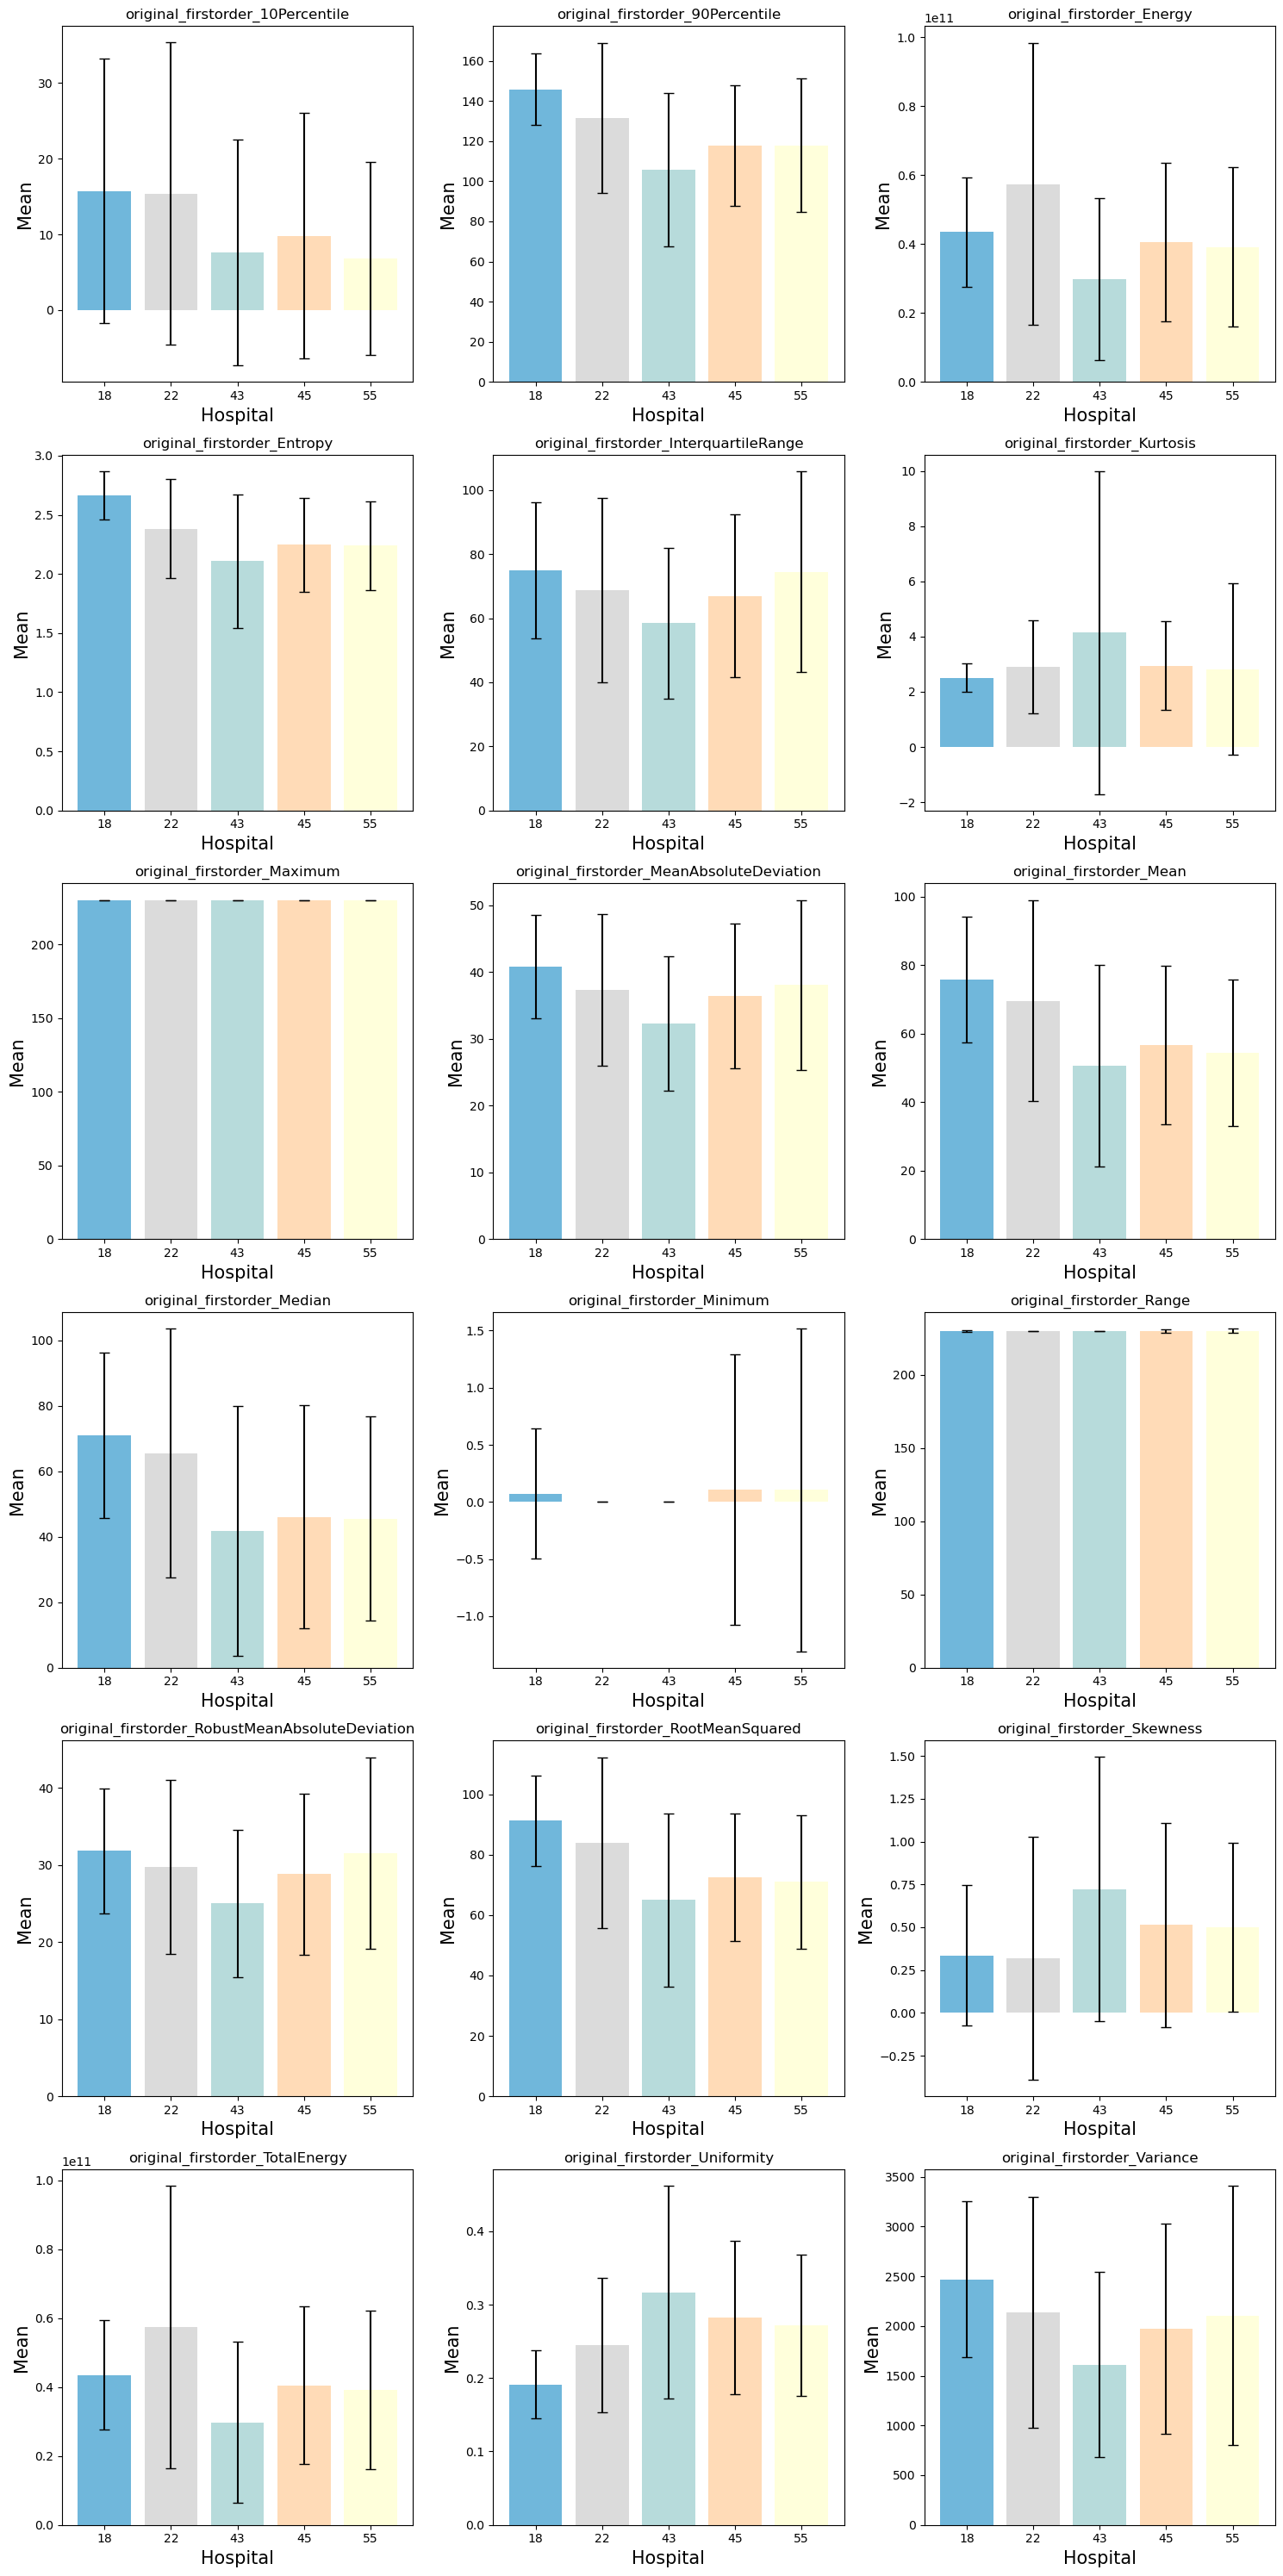

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# read csv
csv_file_path = "/local/data1/honzh/local_repository/FL/code/radiomics/mean_std_results.csv"
data = pd.read_csv(csv_file_path)

# features to plot
columns_to_plot = [
    'original_firstorder_10Percentile',
    'original_firstorder_90Percentile',
    'original_firstorder_Energy',
    'original_firstorder_Entropy',
    'original_firstorder_InterquartileRange',
    'original_firstorder_Kurtosis',
    'original_firstorder_Maximum',
    'original_firstorder_MeanAbsoluteDeviation',
    'original_firstorder_Mean',
    'original_firstorder_Median',
    'original_firstorder_Minimum',
    'original_firstorder_Range',
    'original_firstorder_RobustMeanAbsoluteDeviation',
    'original_firstorder_RootMeanSquared',
    'original_firstorder_Skewness',
    'original_firstorder_TotalEnergy',
    'original_firstorder_Uniformity',
    'original_firstorder_Variance'
]

# plots row and column number
num_features = len(columns_to_plot)
num_cols = 3  # 3 columns
num_rows = (num_features + num_cols - 1) // num_cols  # row number

# subplot
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# bar chart with different colors for each hospital
colors = ['#3399CC', '#CCCCCC', '#99CCCC', '#FFCC99', '#FFFFCC']

for idx, feature in enumerate(columns_to_plot):
    row_idx = idx // num_cols
    col_idx = idx % num_cols
    
    # Extracting data for all hospitals
    mean_values = [
        data[f'Hospital {i} Mean'][data['Column Name'] == feature].values[0]
        for i in [18, 22, 43, 45, 55]
    ]
    
    std_values = [
        data[f'Hospital {i} Standard Deviation'][data['Column Name'] == feature].values[0]
        for i in [18, 22, 43, 45, 55]
    ]
    
    # bar with different colors for each hospital
    axs[row_idx, col_idx].bar(['18', '22', '43', '45', '55'],
                              mean_values,
                              yerr=std_values,
                              color=colors,
                              alpha=0.7, capsize=4)
    
    # title label
    axs[row_idx, col_idx].set_title(feature)
    axs[row_idx, col_idx].set_ylabel('Mean', fontsize=15)
    axs[row_idx, col_idx].set_xlabel('Hospital', fontsize=15)

# adjust layout
plt.tight_layout()
plt.show()


# glcm


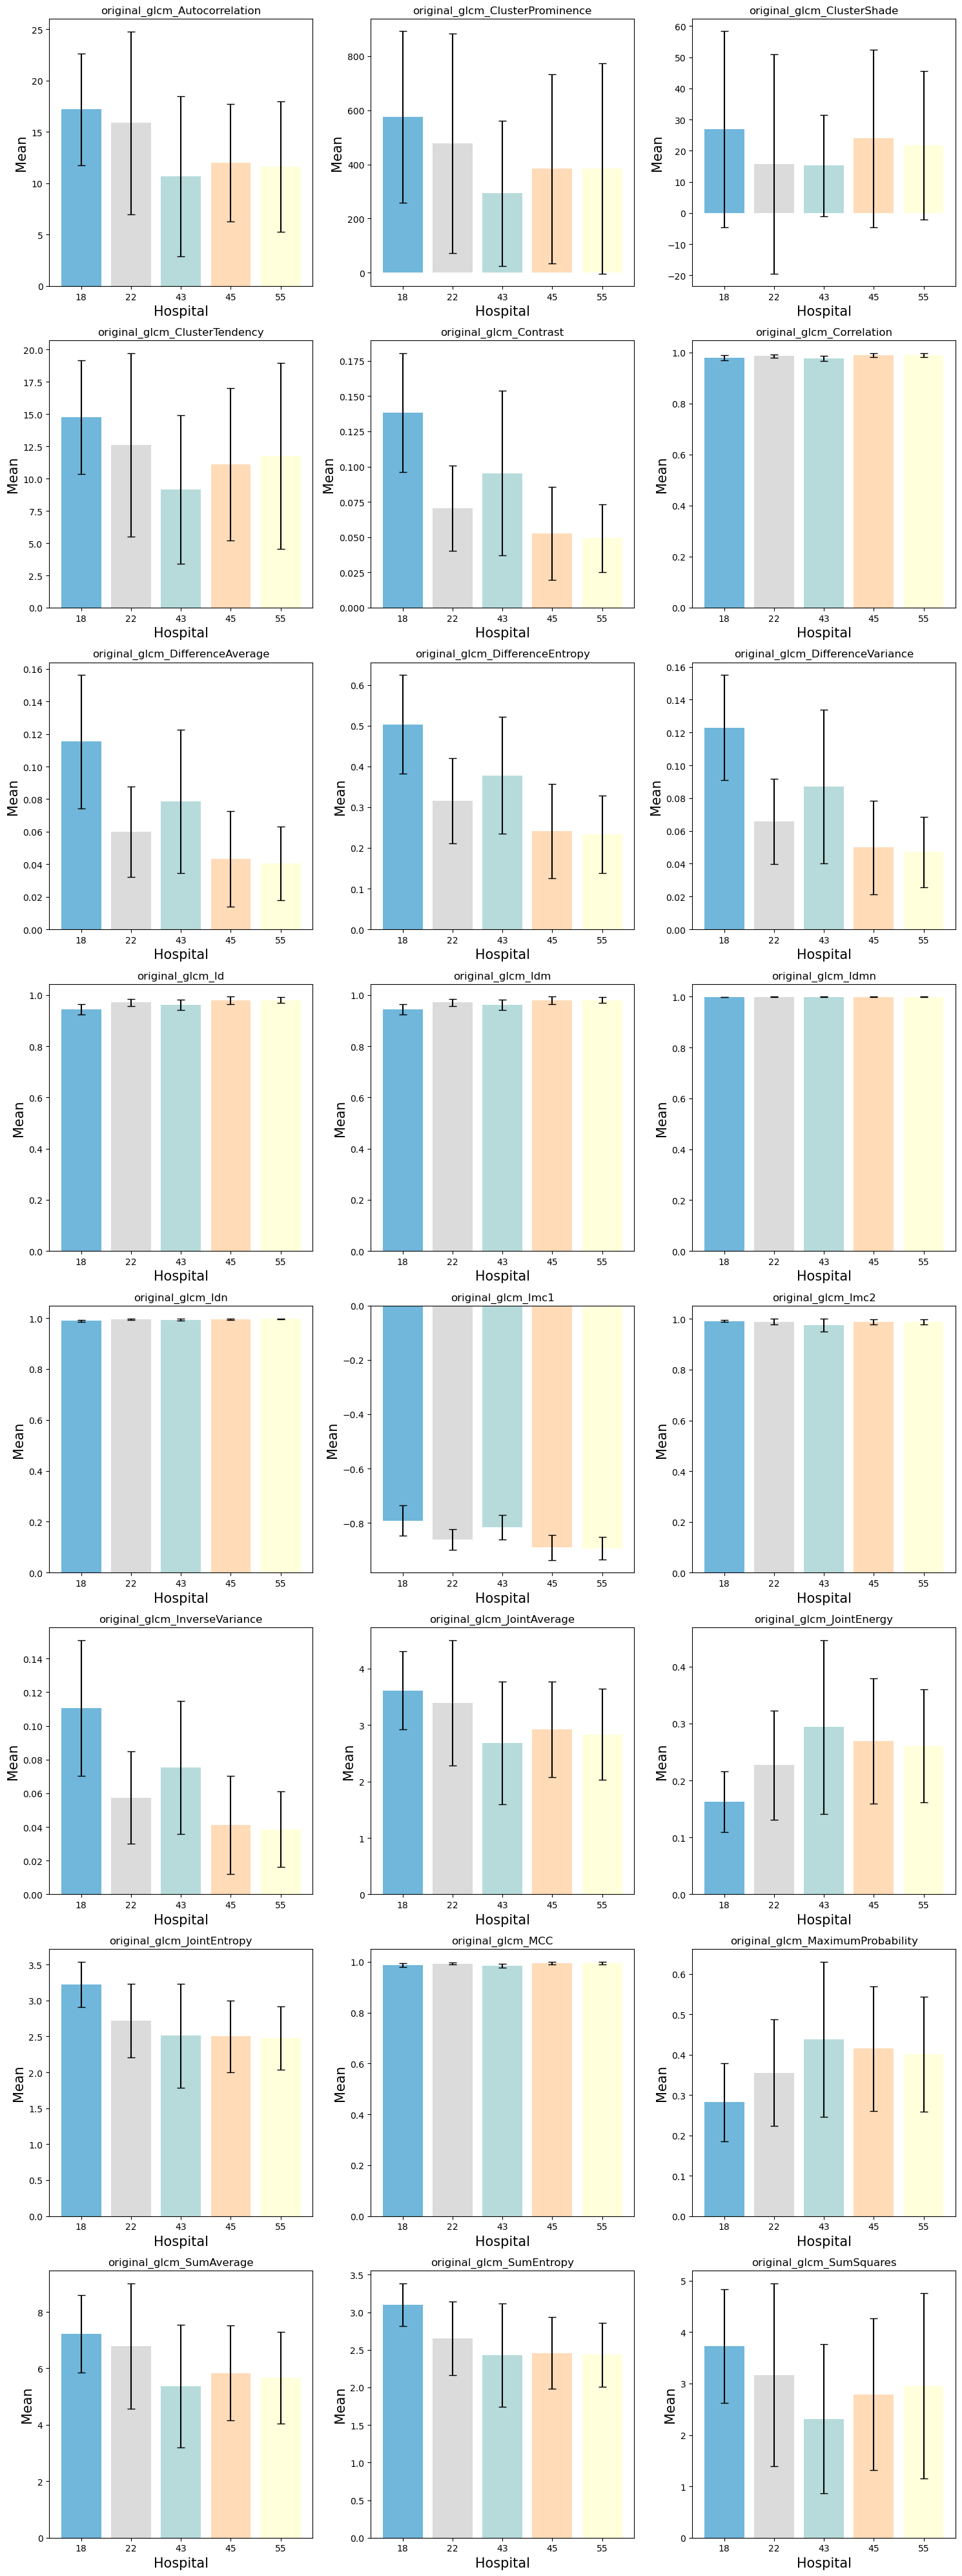

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# read csv
csv_file_path = "/local/data1/honzh/local_repository/FL/code/radiomics/mean_std_results.csv"
data = pd.read_csv(csv_file_path)

# features to plot
columns_to_plot = [
    'original_glcm_Autocorrelation',
    'original_glcm_ClusterProminence',
    'original_glcm_ClusterShade',
    'original_glcm_ClusterTendency',
    'original_glcm_Contrast',
    'original_glcm_Correlation',
    'original_glcm_DifferenceAverage',
    'original_glcm_DifferenceEntropy',
    'original_glcm_DifferenceVariance',
    'original_glcm_Id',
    'original_glcm_Idm',
    'original_glcm_Idmn',
    'original_glcm_Idn',
    'original_glcm_Imc1',
    'original_glcm_Imc2',
    'original_glcm_InverseVariance',
    'original_glcm_JointAverage',
    'original_glcm_JointEnergy',
    'original_glcm_JointEntropy',
    'original_glcm_MCC',
    'original_glcm_MaximumProbability',
    'original_glcm_SumAverage',
    'original_glcm_SumEntropy',
    'original_glcm_SumSquares'

]

# plots row and column number
num_features = len(columns_to_plot)
num_cols = 3  # 3 columns
num_rows = (num_features + num_cols - 1) // num_cols  # row number

# subplot
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# bar chart with different colors for each hospital
colors = ['#3399CC', '#CCCCCC', '#99CCCC', '#FFCC99', '#FFFFCC']

for idx, feature in enumerate(columns_to_plot):
    row_idx = idx // num_cols
    col_idx = idx % num_cols
    
    # Extracting data for all hospitals
    mean_values = [
        data[f'Hospital {i} Mean'][data['Column Name'] == feature].values[0]
        for i in [18, 22, 43, 45, 55]
    ]
    
    std_values = [
        data[f'Hospital {i} Standard Deviation'][data['Column Name'] == feature].values[0]
        for i in [18, 22, 43, 45, 55]
    ]
    
    # bar with different colors for each hospital
    axs[row_idx, col_idx].bar(['18', '22', '43', '45', '55'],
                              mean_values,
                              yerr=std_values,
                              color=colors,
                              alpha=0.7, capsize=4)
    
    # title label
    axs[row_idx, col_idx].set_title(feature)
    axs[row_idx, col_idx].set_ylabel('Mean', fontsize=15)
    axs[row_idx, col_idx].set_xlabel('Hospital', fontsize=15)

# adjust layout
plt.tight_layout()
plt.show()


# gldm

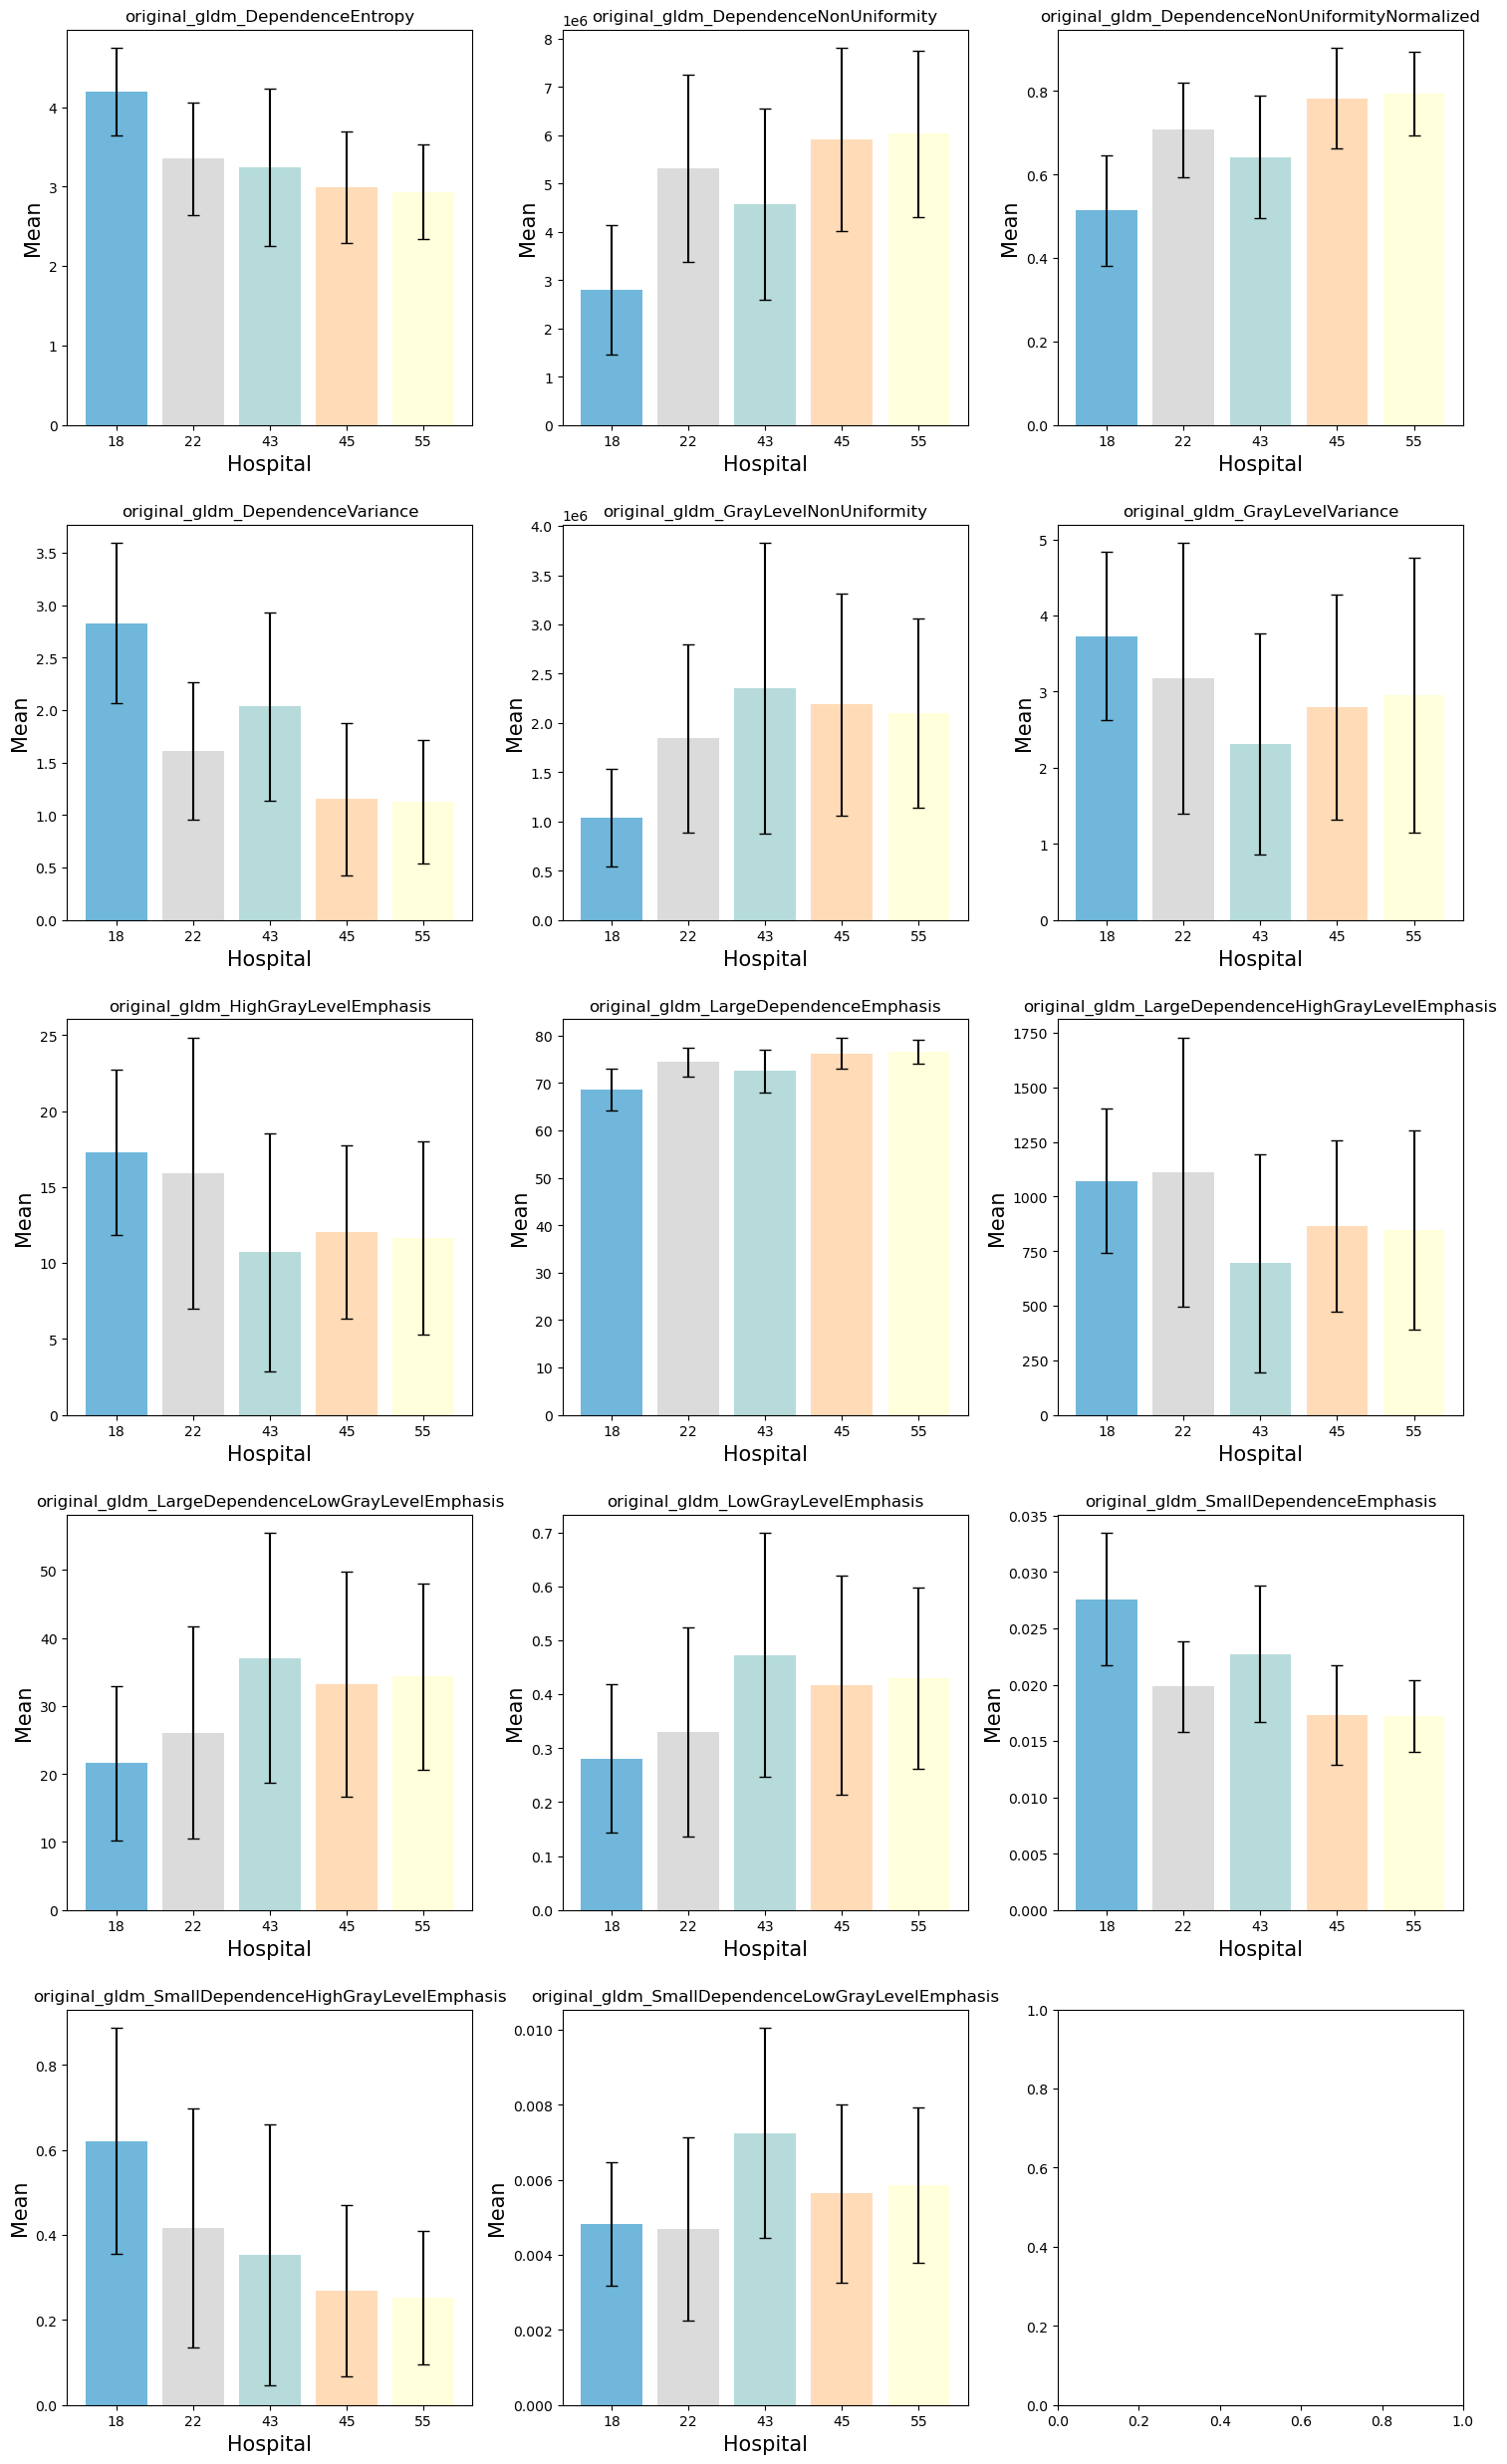

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# read csv
csv_file_path = "/local/data1/honzh/local_repository/FL/code/radiomics/mean_std_results.csv"
data = pd.read_csv(csv_file_path)

# features to plot
columns_to_plot = [
    'original_gldm_DependenceEntropy',
    'original_gldm_DependenceNonUniformity',
    'original_gldm_DependenceNonUniformityNormalized',
    'original_gldm_DependenceVariance',
    'original_gldm_GrayLevelNonUniformity',
    'original_gldm_GrayLevelVariance',
    'original_gldm_HighGrayLevelEmphasis',
    'original_gldm_LargeDependenceEmphasis',
    'original_gldm_LargeDependenceHighGrayLevelEmphasis',
    'original_gldm_LargeDependenceLowGrayLevelEmphasis',
    'original_gldm_LowGrayLevelEmphasis',
    'original_gldm_SmallDependenceEmphasis',
    'original_gldm_SmallDependenceHighGrayLevelEmphasis',
    'original_gldm_SmallDependenceLowGrayLevelEmphasis'


]

# plots row and column number
num_features = len(columns_to_plot)
num_cols = 3  # 3 columns
num_rows = (num_features + num_cols - 1) // num_cols  # row number

# subplot
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# bar chart with different colors for each hospital
colors = ['#3399CC', '#CCCCCC', '#99CCCC', '#FFCC99', '#FFFFCC']

for idx, feature in enumerate(columns_to_plot):
    row_idx = idx // num_cols
    col_idx = idx % num_cols
    
    # Extracting data for all hospitals
    mean_values = [
        data[f'Hospital {i} Mean'][data['Column Name'] == feature].values[0]
        for i in [18, 22, 43, 45, 55]
    ]
    
    std_values = [
        data[f'Hospital {i} Standard Deviation'][data['Column Name'] == feature].values[0]
        for i in [18, 22, 43, 45, 55]
    ]
    
    # bar with different colors for each hospital
    axs[row_idx, col_idx].bar(['18', '22', '43', '45', '55'],
                              mean_values,
                              yerr=std_values,
                              color=colors,
                              alpha=0.7, capsize=4)
    
    # title label
    axs[row_idx, col_idx].set_title(feature)
    axs[row_idx, col_idx].set_ylabel('Mean', fontsize=15)
    axs[row_idx, col_idx].set_xlabel('Hospital', fontsize=15)

# adjust layout
plt.tight_layout()
plt.show()


# glrlm

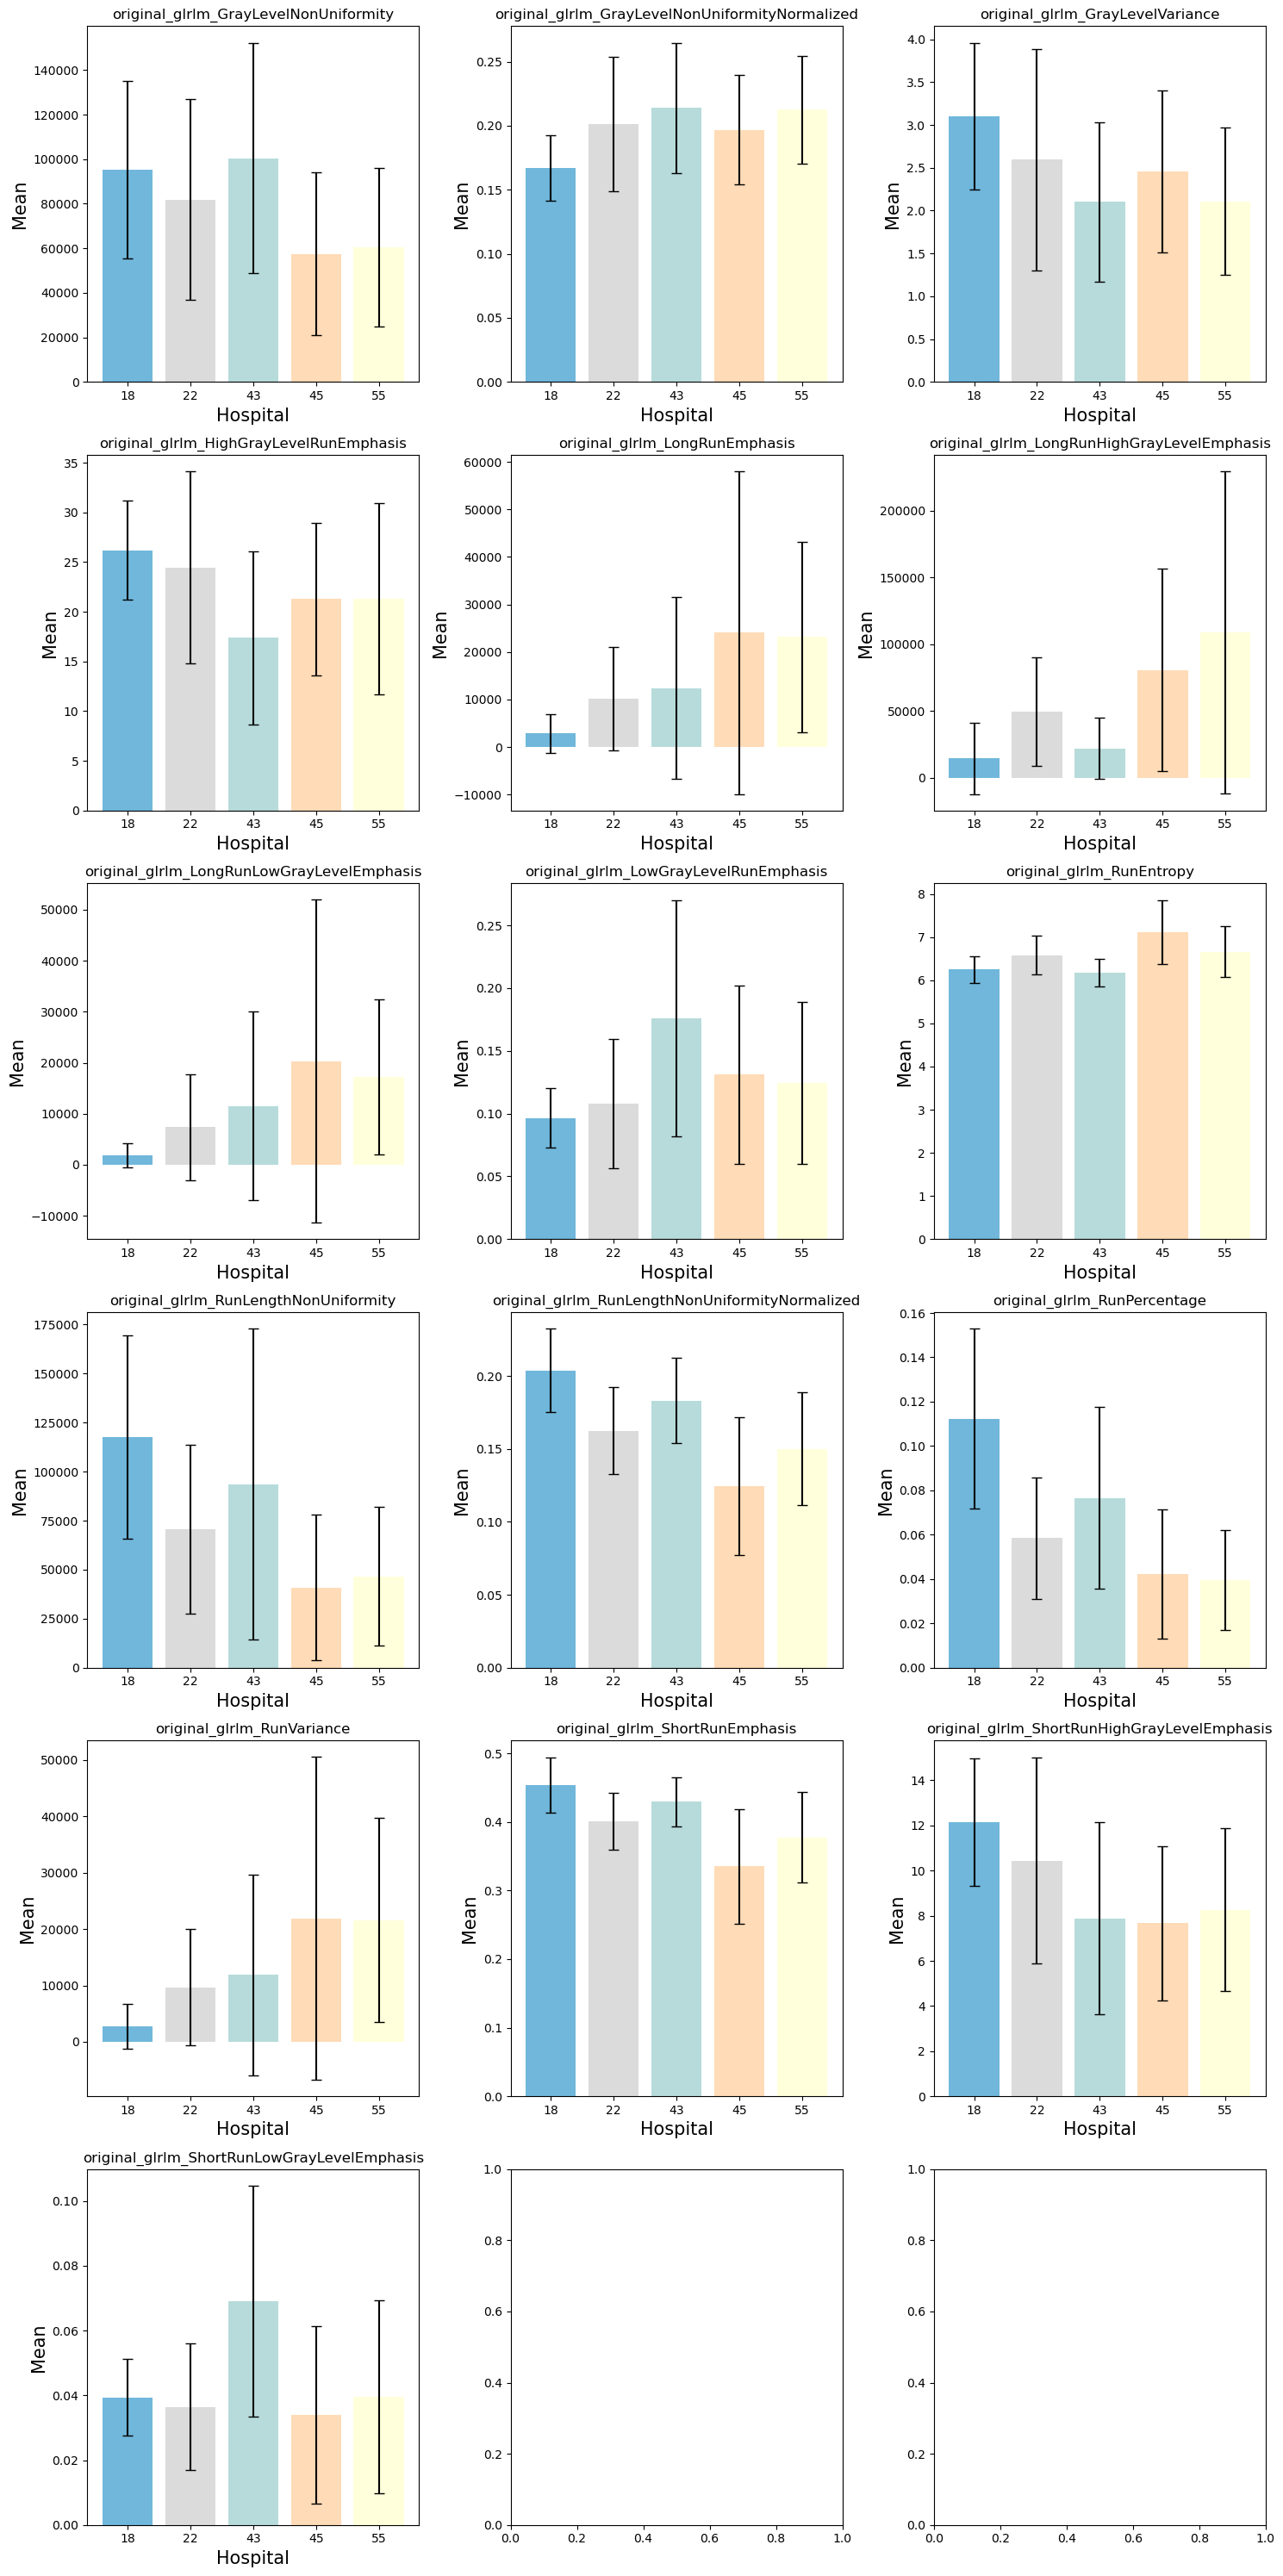

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# read csv
csv_file_path = "/local/data1/honzh/local_repository/FL/code/radiomics/mean_std_results.csv"
data = pd.read_csv(csv_file_path)

# features to plot
columns_to_plot = [
'original_glrlm_GrayLevelNonUniformity',
'original_glrlm_GrayLevelNonUniformityNormalized',
'original_glrlm_GrayLevelVariance',
'original_glrlm_HighGrayLevelRunEmphasis',
'original_glrlm_LongRunEmphasis',
'original_glrlm_LongRunHighGrayLevelEmphasis',
'original_glrlm_LongRunLowGrayLevelEmphasis',
'original_glrlm_LowGrayLevelRunEmphasis',
'original_glrlm_RunEntropy',
'original_glrlm_RunLengthNonUniformity',
'original_glrlm_RunLengthNonUniformityNormalized',
'original_glrlm_RunPercentage',
'original_glrlm_RunVariance',
'original_glrlm_ShortRunEmphasis',
'original_glrlm_ShortRunHighGrayLevelEmphasis',
'original_glrlm_ShortRunLowGrayLevelEmphasis'


]

# plots row and column number
num_features = len(columns_to_plot)
num_cols = 3  # 3 columns
num_rows = (num_features + num_cols - 1) // num_cols  # row number

# subplot
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# bar chart with different colors for each hospital
colors = ['#3399CC', '#CCCCCC', '#99CCCC', '#FFCC99', '#FFFFCC']

for idx, feature in enumerate(columns_to_plot):
    row_idx = idx // num_cols
    col_idx = idx % num_cols
    
    # Extracting data for all hospitals
    mean_values = [
        data[f'Hospital {i} Mean'][data['Column Name'] == feature].values[0]
        for i in [18, 22, 43, 45, 55]
    ]
    
    std_values = [
        data[f'Hospital {i} Standard Deviation'][data['Column Name'] == feature].values[0]
        for i in [18, 22, 43, 45, 55]
    ]
    
    # bar with different colors for each hospital
    axs[row_idx, col_idx].bar(['18', '22', '43', '45', '55'],
                              mean_values,
                              yerr=std_values,
                              color=colors,
                              alpha=0.7, capsize=4)
    
    # title label
    axs[row_idx, col_idx].set_title(feature)
    axs[row_idx, col_idx].set_ylabel('Mean', fontsize=15)
    axs[row_idx, col_idx].set_xlabel('Hospital', fontsize=15)

# adjust layout
plt.tight_layout()
plt.show()


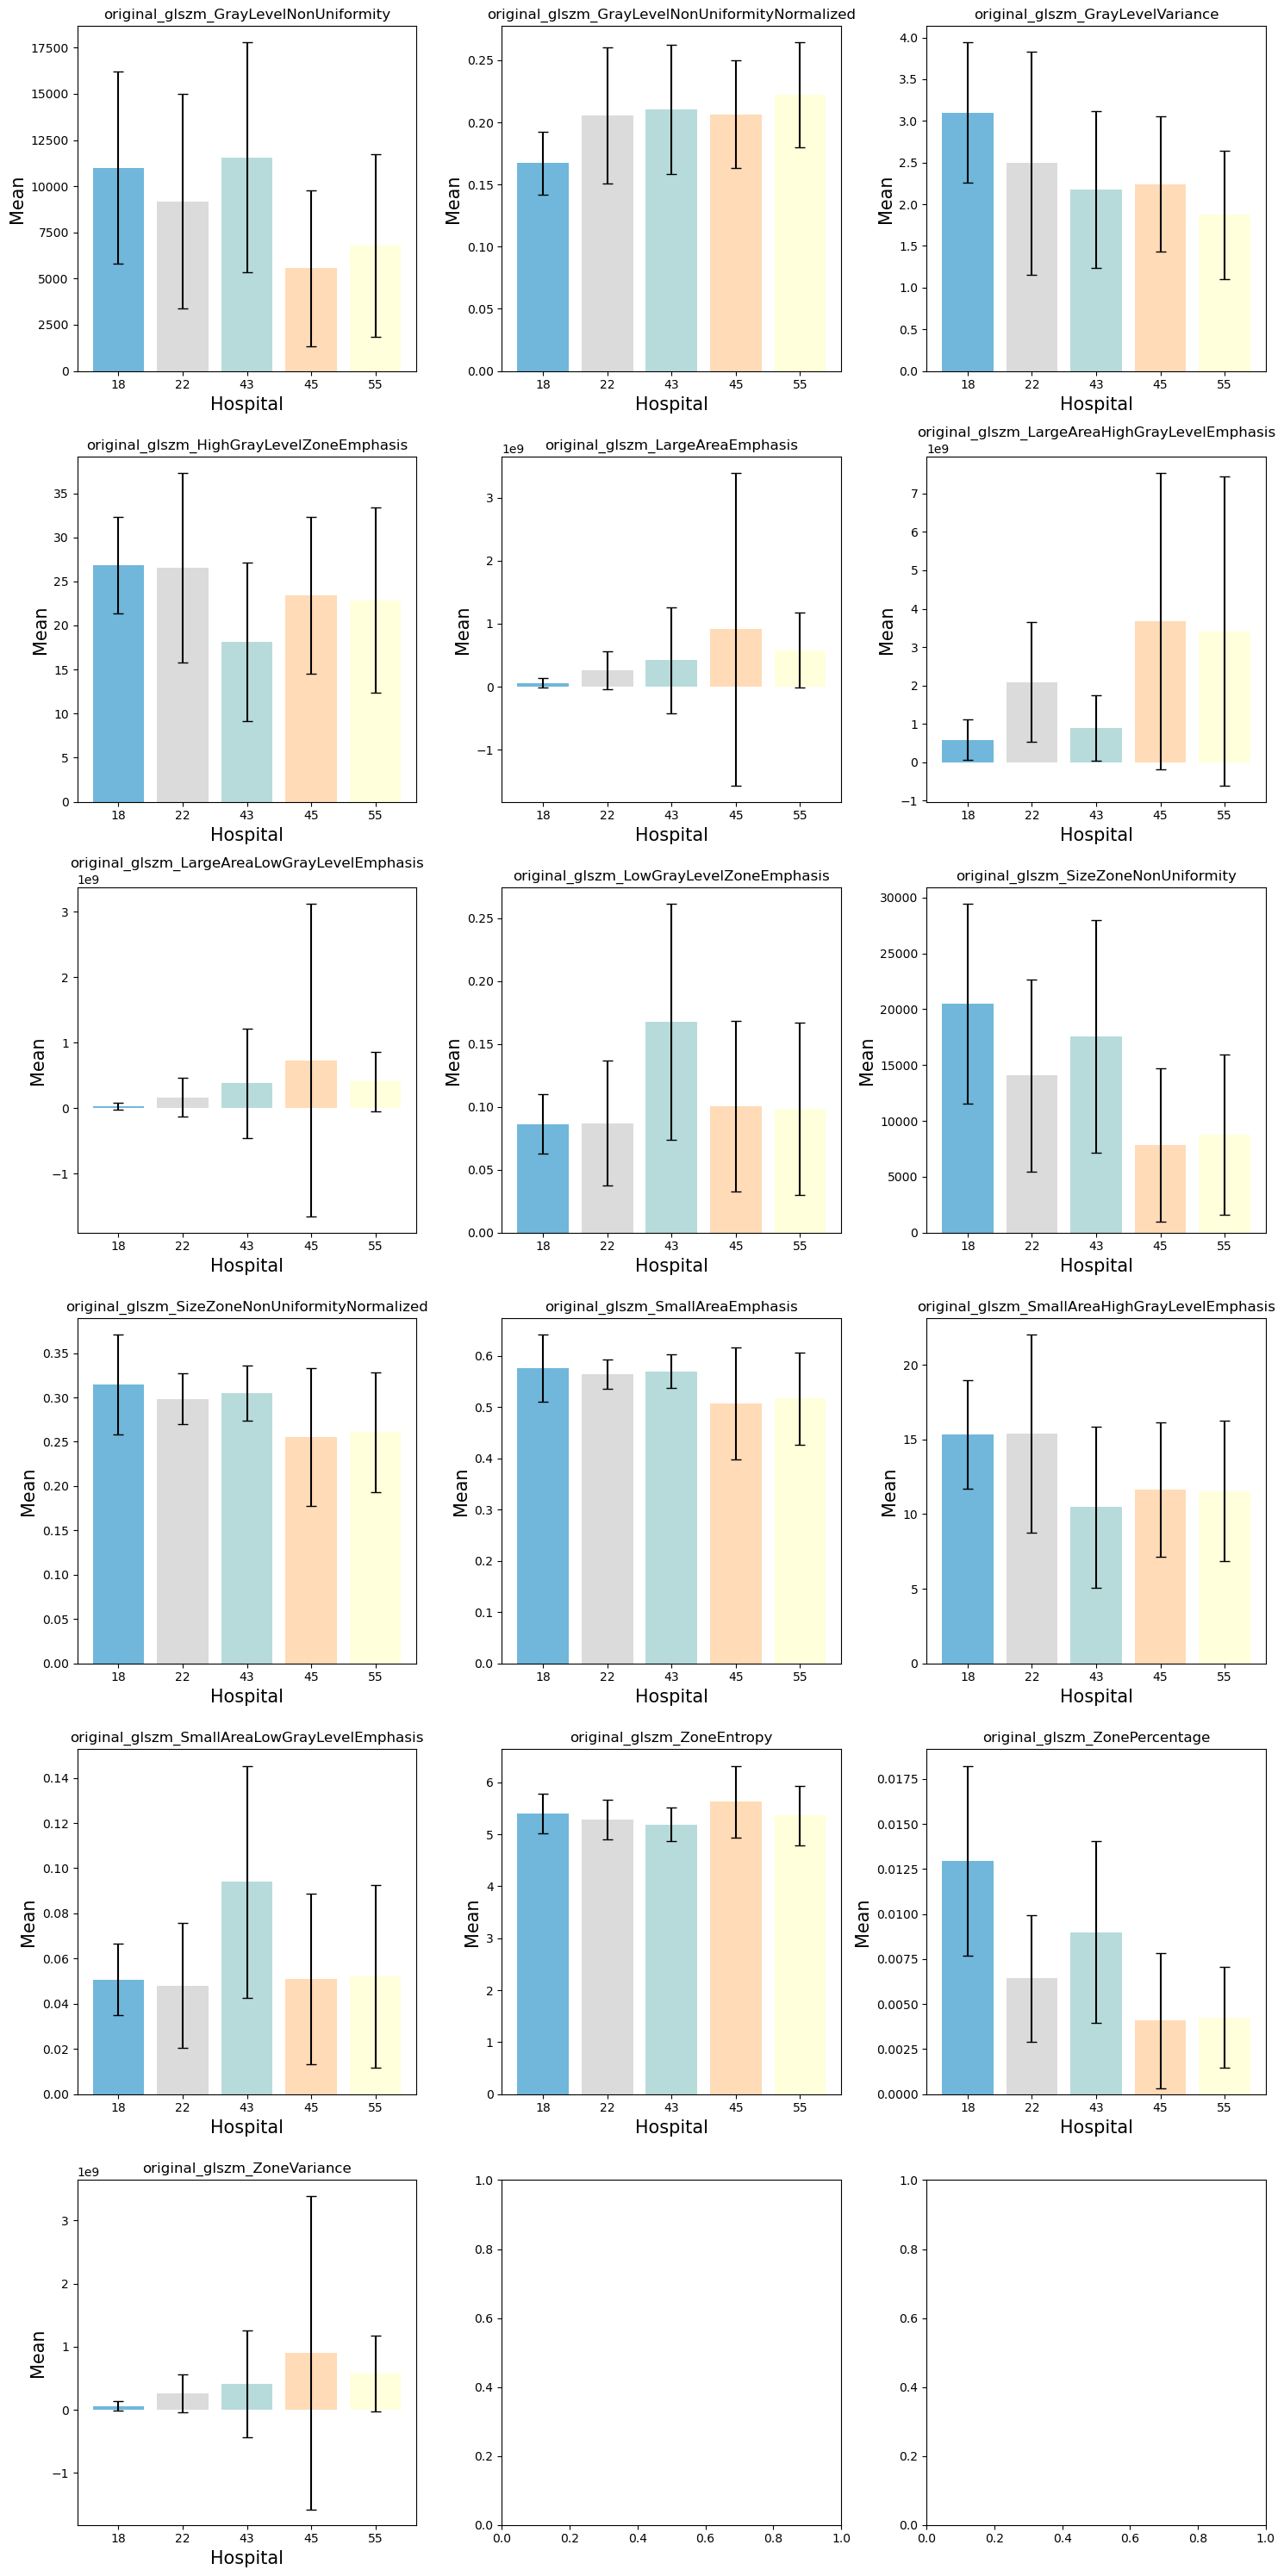

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# read csv
csv_file_path = "/local/data1/honzh/local_repository/FL/code/radiomics/mean_std_results.csv"
data = pd.read_csv(csv_file_path)

# features to plot
columns_to_plot = [
'original_glszm_GrayLevelNonUniformity',
'original_glszm_GrayLevelNonUniformityNormalized',
'original_glszm_GrayLevelVariance',
'original_glszm_HighGrayLevelZoneEmphasis',
'original_glszm_LargeAreaEmphasis',
'original_glszm_LargeAreaHighGrayLevelEmphasis',
'original_glszm_LargeAreaLowGrayLevelEmphasis',
'original_glszm_LowGrayLevelZoneEmphasis',
'original_glszm_SizeZoneNonUniformity',
'original_glszm_SizeZoneNonUniformityNormalized',
'original_glszm_SmallAreaEmphasis',
'original_glszm_SmallAreaHighGrayLevelEmphasis',
'original_glszm_SmallAreaLowGrayLevelEmphasis',
'original_glszm_ZoneEntropy',
'original_glszm_ZonePercentage',
'original_glszm_ZoneVariance'



]

# plots row and column number
num_features = len(columns_to_plot)
num_cols = 3  # 3 columns
num_rows = (num_features + num_cols - 1) // num_cols  # row number

# subplot
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# bar chart with different colors for each hospital
colors = ['#3399CC', '#CCCCCC', '#99CCCC', '#FFCC99', '#FFFFCC']

for idx, feature in enumerate(columns_to_plot):
    row_idx = idx // num_cols
    col_idx = idx % num_cols
    
    # Extracting data for all hospitals
    mean_values = [
        data[f'Hospital {i} Mean'][data['Column Name'] == feature].values[0]
        for i in [18, 22, 43, 45, 55]
    ]
    
    std_values = [
        data[f'Hospital {i} Standard Deviation'][data['Column Name'] == feature].values[0]
        for i in [18, 22, 43, 45, 55]
    ]
    
    # bar with different colors for each hospital
    axs[row_idx, col_idx].bar(['18', '22', '43', '45', '55'],
                              mean_values,
                              yerr=std_values,
                              color=colors,
                              alpha=0.7, capsize=4)
    
    # title label
    axs[row_idx, col_idx].set_title(feature)
    axs[row_idx, col_idx].set_ylabel('Mean', fontsize=15)
    axs[row_idx, col_idx].set_xlabel('Hospital', fontsize=15)

# adjust layout
plt.tight_layout()
plt.show()


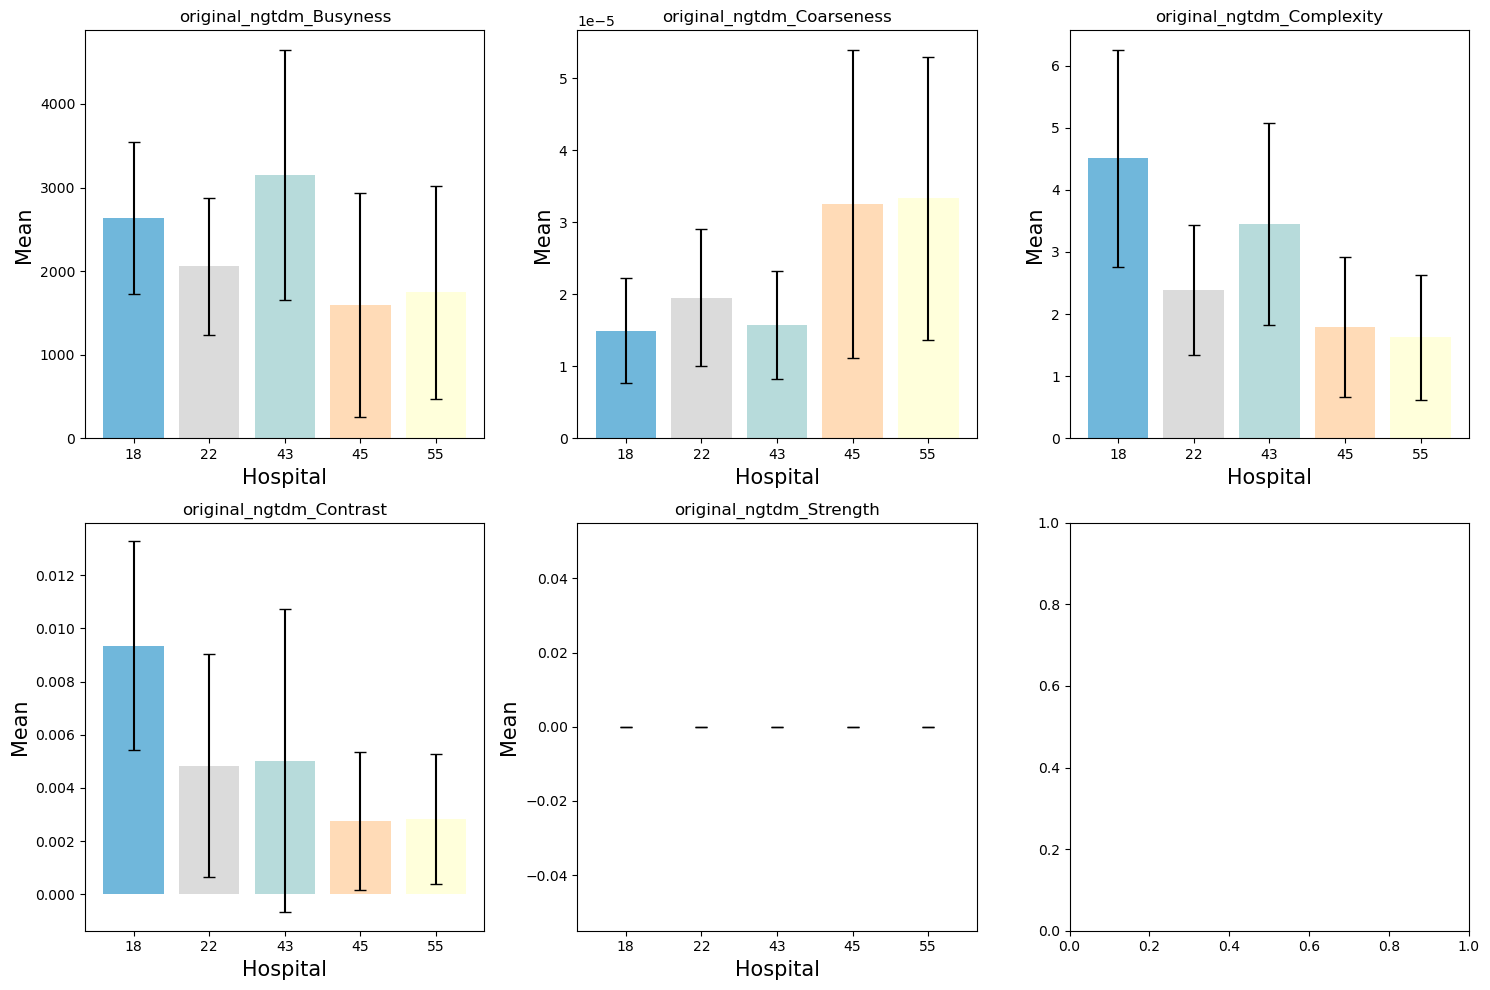

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# read csv
csv_file_path = "/local/data1/honzh/local_repository/FL/code/radiomics/mean_std_results.csv"
data = pd.read_csv(csv_file_path)

# features to plot
columns_to_plot = [
    'original_ngtdm_Busyness',
    'original_ngtdm_Coarseness',
    'original_ngtdm_Complexity',
    'original_ngtdm_Contrast',
    'original_ngtdm_Strength'
]

# plots row and column number
num_features = len(columns_to_plot)
num_cols = 3  # 3 columns
num_rows = (num_features + num_cols - 1) // num_cols  # row number

# subplot
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# bar chart with different colors for each hospital
colors = ['#3399CC', '#CCCCCC', '#99CCCC', '#FFCC99', '#FFFFCC']

for idx, feature in enumerate(columns_to_plot):
    row_idx = idx // num_cols
    col_idx = idx % num_cols

    mean_values = []
    std_values = []

    for i in [18, 22, 43, 45, 55]:
        hospital_mean = data[f'Hospital {i} Mean'][data['Column Name'] == feature]
        hospital_std = data[f'Hospital {i} Standard Deviation'][data['Column Name'] == feature]

        if not hospital_mean.empty and not hospital_std.empty:
            mean_values.append(hospital_mean.values[0])
            std_values.append(hospital_std.values[0])
        else:
            mean_values.append(0)  # or any default value
            std_values.append(0)   # or any default value

    # bar with different colors for each hospital
    axs[row_idx, col_idx].bar(['18', '22', '43', '45', '55'],
                              mean_values,
                              yerr=std_values,
                              color=colors,
                              alpha=0.7, capsize=4)

    # title label
    axs[row_idx, col_idx].set_title(feature)
    axs[row_idx, col_idx].set_ylabel('Mean', fontsize=15)
    axs[row_idx, col_idx].set_xlabel('Hospital', fontsize=15)

# adjust layout
plt.tight_layout()
plt.show()


# brightness, contrast, skewness, and kurtosis

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV文件路径
csv_file_paths = [
    "/local/data1/honzh/local_repository/FL/code/radiomics/hospital18_features.csv",
    "/local/data1/honzh/local_repository/FL/code/radiomics/hospital22_features.csv",
    "/local/data1/honzh/local_repository/FL/code/radiomics/hospital43_features.csv",
    "/local/data1/honzh/local_repository/FL/code/radiomics/hospital45_features.csv",
    "/local/data1/honzh/local_repository/FL/code/radiomics/hospital55_features.csv",

]

# 要绘制的特征列
feature_columns = [
    'original_firstorder_10Percentile',
    'original_firstorder_90Percentile',
    'original_firstorder_Energy',
    'original_firstorder_Entropy',
    'original_firstorder_InterquartileRange',
    'original_firstorder_Kurtosis',
    'original_firstorder_Maximum',
    'original_firstorder_MeanAbsoluteDeviation',
    'original_firstorder_Mean',
    'original_firstorder_Median',
    'original_firstorder_Minimum',
    'original_firstorder_Range',
    'original_firstorder_RobustMeanAbsoluteDeviation',
    'original_firstorder_RootMeanSquared',
    'original_firstorder_Skewness',
    'original_firstorder_TotalEnergy',
    'original_firstorder_Uniformity',
    'original_firstorder_Variance'
]

# 创建画布和子图
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

plt.figure(figsize=(18, 12))

# 遍历每个CSV文件，绘制特征分布图
for idx, csv_file_path in enumerate(csv_file_paths):
    # 读取CSV文件中的特定特征列
    data = pd.read_csv(csv_file_path, usecols=feature_columns)
    
    # 绘制特征的分布图
    for i, feature in enumerate(feature_columns):
        plt.subplot(3, len(feature_columns), i + 1 + idx * len(feature_columns))
        sns.histplot(data[feature], kde=True, color=colors[idx])
        plt.xlabel(feature)
        plt.ylabel('Density')
        plt.title(f'{feature}')

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/normal_hospital18_features.csv'

<Figure size 1800x1200 with 0 Axes>

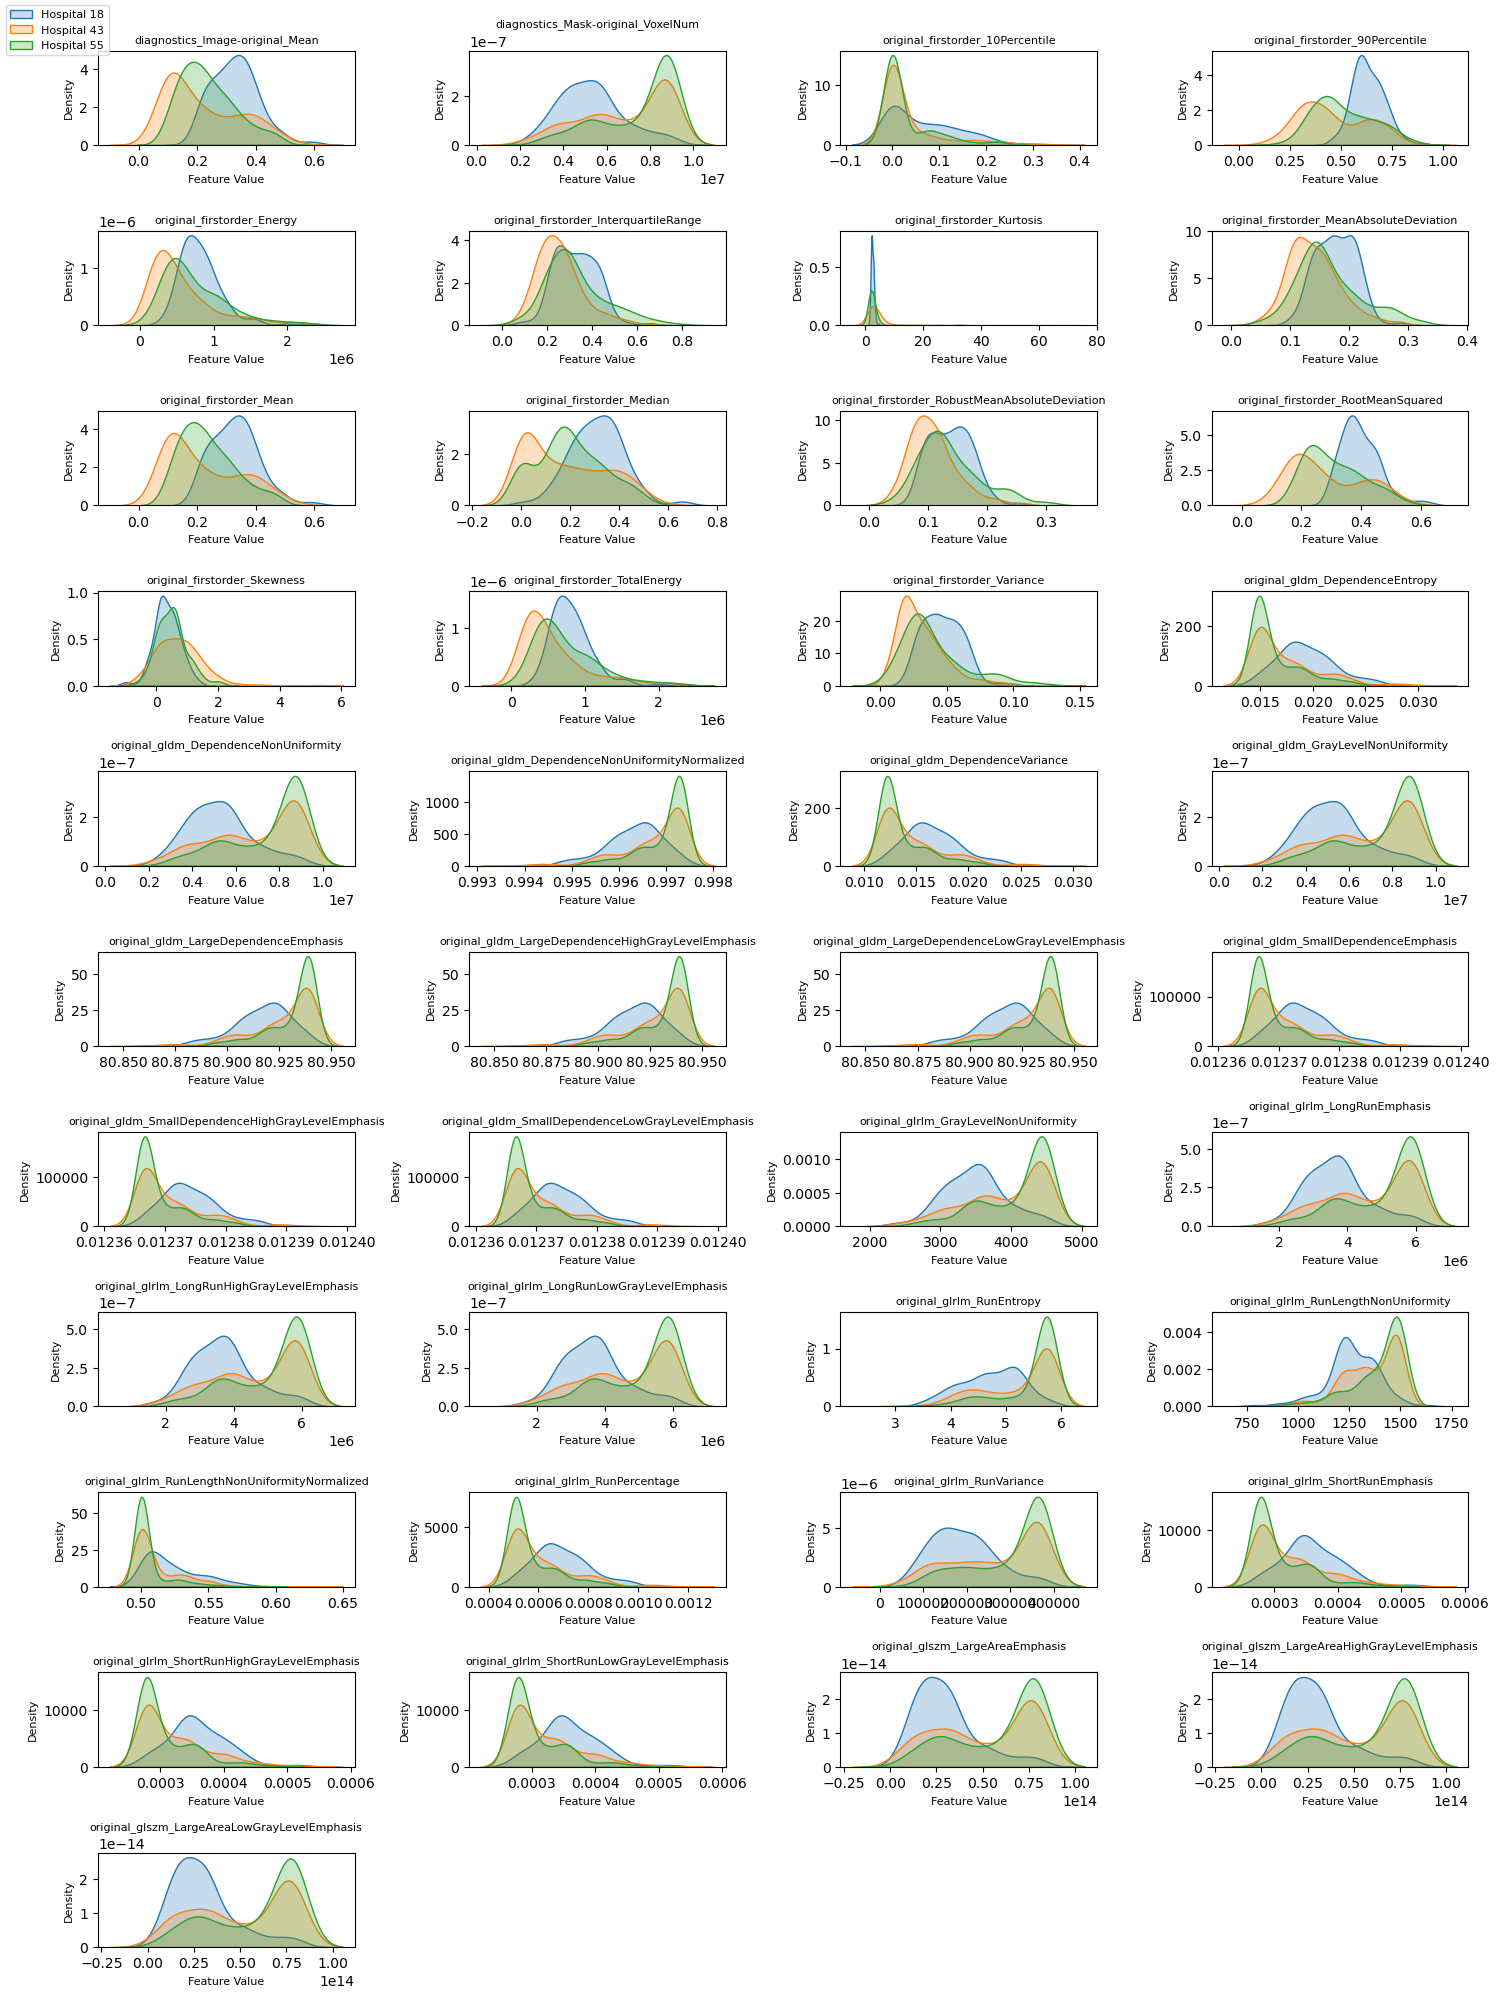

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV文件路径
csv_file_paths = [
    "/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/normal_hospital18_features.csv",
    "/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/normal_hospital43_features.csv",
    "/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/normal_hospital55_features.csv"
]

# 要绘制的特征列
feature_columns = [
    'diagnostics_Image-original_Mean',
    'diagnostics_Mask-original_VoxelNum',
    'original_firstorder_10Percentile',
    'original_firstorder_90Percentile',
    'original_firstorder_Energy',
    'original_firstorder_InterquartileRange',
    'original_firstorder_Kurtosis',
    'original_firstorder_MeanAbsoluteDeviation',
    'original_firstorder_Mean',
    'original_firstorder_Median',
    'original_firstorder_RobustMeanAbsoluteDeviation',
    'original_firstorder_RootMeanSquared',
    'original_firstorder_Skewness',
    'original_firstorder_TotalEnergy',
    'original_firstorder_Variance',
    'original_gldm_DependenceEntropy',
    'original_gldm_DependenceNonUniformity',
    'original_gldm_DependenceNonUniformityNormalized',
    'original_gldm_DependenceVariance',
    'original_gldm_GrayLevelNonUniformity',
    'original_gldm_LargeDependenceEmphasis',
    'original_gldm_LargeDependenceHighGrayLevelEmphasis',
    'original_gldm_LargeDependenceLowGrayLevelEmphasis',
    'original_gldm_SmallDependenceEmphasis',
    'original_gldm_SmallDependenceHighGrayLevelEmphasis',
    'original_gldm_SmallDependenceLowGrayLevelEmphasis',
    'original_glrlm_GrayLevelNonUniformity',
    'original_glrlm_LongRunEmphasis',
    'original_glrlm_LongRunHighGrayLevelEmphasis',
    'original_glrlm_LongRunLowGrayLevelEmphasis',
    'original_glrlm_RunEntropy',
    'original_glrlm_RunLengthNonUniformity',
    'original_glrlm_RunLengthNonUniformityNormalized',
    'original_glrlm_RunPercentage',
    'original_glrlm_RunVariance',
    'original_glrlm_ShortRunEmphasis',
    'original_glrlm_ShortRunHighGrayLevelEmphasis',
    'original_glrlm_ShortRunLowGrayLevelEmphasis',
    'original_glszm_LargeAreaEmphasis',
    'original_glszm_LargeAreaHighGrayLevelEmphasis',
    'original_glszm_LargeAreaLowGrayLevelEmphasis'
]
# 创建子图
num_features = len(feature_columns)
num_hospitals = len(csv_file_paths)
num_cols = 4  # 每行的子图数量
num_rows = (num_features + num_cols - 1) // num_cols  # 计算需要的行数

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# 自定义医院标签
hospital_labels = ['Hospital 18', 'Hospital 43', 'Hospital 55']

# 遍历每个特征，绘制平滑曲线
for i, feature in enumerate(feature_columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    axs[row_idx, col_idx].set_title(feature, fontsize = 8)
    axs[row_idx, col_idx].set_xlabel('Feature Value', fontsize = 8)
    axs[row_idx, col_idx].set_ylabel('Density', fontsize = 8)

    for j, csv_file_path in enumerate(csv_file_paths):
        # 读取CSV文件中的特定特征列
        data = pd.read_csv(csv_file_path, usecols=[feature])
        # 绘制当前特征的平滑曲线
        sns.kdeplot(data[feature], ax=axs[row_idx, col_idx], fill=True, label=hospital_labels[j], linewidth=1)

# 删除多余的子图
for i in range(len(feature_columns), num_cols * num_rows):
    fig.delaxes(axs.flatten()[i])

# 添加一个图例
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', fontsize=8)

# 调整子图布局
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
from scipy.stats import f_oneway

# CSV文件路径
csv_file_paths = [
    "/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/normal_hospital18_features.csv",
    "/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/normal_hospital43_features.csv",
    "/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/normal_hospital55_features.csv"
]

# 要比较的特征列
feature_columns = [
    'diagnostics_Image-original_Mean',
    'diagnostics_Mask-original_VoxelNum',
    'original_firstorder_10Percentile',
    'original_firstorder_90Percentile',
    'original_firstorder_Energy',
    'original_firstorder_InterquartileRange',
    'original_firstorder_Kurtosis',
    'original_firstorder_MeanAbsoluteDeviation',
    'original_firstorder_Mean',
    'original_firstorder_Median',
    'original_firstorder_RobustMeanAbsoluteDeviation',
    'original_firstorder_RootMeanSquared',
    'original_firstorder_Skewness',
    'original_firstorder_TotalEnergy',
    'original_firstorder_Variance',
    'original_gldm_DependenceEntropy',
    'original_gldm_DependenceNonUniformity',
    'original_gldm_DependenceNonUniformityNormalized',
    'original_gldm_DependenceVariance',
    'original_gldm_GrayLevelNonUniformity',
    'original_gldm_LargeDependenceEmphasis',
    'original_gldm_LargeDependenceHighGrayLevelEmphasis',
    'original_gldm_LargeDependenceLowGrayLevelEmphasis',
    'original_gldm_SmallDependenceEmphasis',
    'original_gldm_SmallDependenceHighGrayLevelEmphasis',
    'original_gldm_SmallDependenceLowGrayLevelEmphasis',
    'original_glrlm_GrayLevelNonUniformity',
    'original_glrlm_LongRunEmphasis',
    'original_glrlm_LongRunHighGrayLevelEmphasis',
    'original_glrlm_LongRunLowGrayLevelEmphasis',
    'original_glrlm_RunEntropy',
    'original_glrlm_RunLengthNonUniformity',
    'original_glrlm_RunLengthNonUniformityNormalized',
    'original_glrlm_RunPercentage',
    'original_glrlm_RunVariance',
    'original_glrlm_ShortRunEmphasis',
    'original_glrlm_ShortRunHighGrayLevelEmphasis',
    'original_glrlm_ShortRunLowGrayLevelEmphasis',
    'original_glszm_LargeAreaEmphasis',
    'original_glszm_LargeAreaHighGrayLevelEmphasis',
    'original_glszm_LargeAreaLowGrayLevelEmphasis'
]

# 读取数据
dfs = [pd.read_csv(file_path)[feature_columns] for file_path in csv_file_paths]

# 执行单向方差分析
f_statistic, p_value = f_oneway(*dfs)

# 输出结果
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# 判断是否显著
alpha = 0.05
if p_value < alpha:
    print("拒绝零假设，存在统计显著差异。")
else:
    print("接受零假设，不存在统计显著差异。")


F-statistic: [45.21636005 58.05241652 15.98987746 61.1608866  19.21246299 26.83867234
  7.97931327 31.56805853 45.21636005 33.86956235 28.80405381 50.80548927
 17.57542621 19.21246299 30.73599821 43.61177222 58.05860556 42.51266219
 42.50602812 58.05241652 42.48375667 42.48375667 42.48375667 42.47701765
 42.47701765 42.47701765 53.48075026 56.80634459 56.80634459 56.80634459
 57.40688912 38.73837212 30.79649553 42.48292632 61.44312674 44.02903429
 44.02903429 44.02903429 62.64612832 62.64612832 62.64612832]
P-value: [6.67306790e-19 1.35841802e-23 1.78137961e-07 1.05740567e-24
 8.62322026e-09 7.58980200e-12 3.83820456e-04 1.05699902e-13
 6.67306790e-19 1.35258176e-14 1.27453720e-12 5.73922823e-21
 3.99854855e-08 8.62322026e-09 2.23122796e-13 2.65453376e-18
 1.35149831e-23 6.86271375e-18 6.90224019e-18 1.35841802e-23
 7.03661444e-18 7.03661444e-18 7.03661444e-18 7.07778923e-18
 7.07778923e-18 7.07778923e-18 6.06389120e-22 3.80561361e-23
 3.80561361e-23 3.80561361e-23 2.31523151e-23 1.836

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [12]:
# 读取数据
dfs = [pd.read_csv(file_path)[feature_columns] for file_path in csv_file_paths]

# 执行单向方差分析
f_statistic, p_values = f_oneway(*dfs)

# 输出结果
print(f"F-statistic: {f_statistic}")
print(f"P-values: {p_values}")

# 判断是否显著
alpha = 0.05
if any(p < alpha for p in p_values):
    print("拒绝零假设，存在统计显著差异。")
else:
    print("接受零假设，不存在统计显著差异。")


F-statistic: [45.21636005 58.05241652 15.98987746 61.1608866  19.21246299 26.83867234
  7.97931327 31.56805853 45.21636005 33.86956235 28.80405381 50.80548927
 17.57542621 19.21246299 30.73599821 43.61177222 58.05860556 42.51266219
 42.50602812 58.05241652 42.48375667 42.48375667 42.48375667 42.47701765
 42.47701765 42.47701765 53.48075026 56.80634459 56.80634459 56.80634459
 57.40688912 38.73837212 30.79649553 42.48292632 61.44312674 44.02903429
 44.02903429 44.02903429 62.64612832 62.64612832 62.64612832]
P-values: [6.67306790e-19 1.35841802e-23 1.78137961e-07 1.05740567e-24
 8.62322026e-09 7.58980200e-12 3.83820456e-04 1.05699902e-13
 6.67306790e-19 1.35258176e-14 1.27453720e-12 5.73922823e-21
 3.99854855e-08 8.62322026e-09 2.23122796e-13 2.65453376e-18
 1.35149831e-23 6.86271375e-18 6.90224019e-18 1.35841802e-23
 7.03661444e-18 7.03661444e-18 7.03661444e-18 7.07778923e-18
 7.07778923e-18 7.07778923e-18 6.06389120e-22 3.80561361e-23
 3.80561361e-23 3.80561361e-23 2.31523151e-23 1.83

In [13]:
import pandas as pd
from scipy.stats import f_oneway

# CSV文件路径
csv_file_paths = [
    "/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/normal_hospital18_features.csv",
    "/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/normal_hospital43_features.csv",
    "/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/normal_hospital55_features.csv"
]

# 要比较的特征列
feature_columns = [
    'diagnostics_Image-original_Mean',
    'diagnostics_Mask-original_VoxelNum',
    'original_firstorder_10Percentile',
    'original_firstorder_90Percentile',
    'original_firstorder_Energy',
    'original_firstorder_InterquartileRange',
    'original_firstorder_Kurtosis',
    'original_firstorder_MeanAbsoluteDeviation',
    'original_firstorder_Mean',
    'original_firstorder_Median',
    'original_firstorder_RobustMeanAbsoluteDeviation',
    'original_firstorder_RootMeanSquared',
    'original_firstorder_Skewness',
    'original_firstorder_TotalEnergy',
    'original_firstorder_Variance',
    'original_gldm_DependenceEntropy',
    'original_gldm_DependenceNonUniformity',
    'original_gldm_DependenceNonUniformityNormalized',
    'original_gldm_DependenceVariance',
    'original_gldm_GrayLevelNonUniformity',
    'original_gldm_LargeDependenceEmphasis',
    'original_gldm_LargeDependenceHighGrayLevelEmphasis',
    'original_gldm_LargeDependenceLowGrayLevelEmphasis',
    'original_gldm_SmallDependenceEmphasis',
    'original_gldm_SmallDependenceHighGrayLevelEmphasis',
    'original_gldm_SmallDependenceLowGrayLevelEmphasis',
    'original_glrlm_GrayLevelNonUniformity',
    'original_glrlm_LongRunEmphasis',
    'original_glrlm_LongRunHighGrayLevelEmphasis',
    'original_glrlm_LongRunLowGrayLevelEmphasis',
    'original_glrlm_RunEntropy',
    'original_glrlm_RunLengthNonUniformity',
    'original_glrlm_RunLengthNonUniformityNormalized',
    'original_glrlm_RunPercentage',
    'original_glrlm_RunVariance',
    'original_glrlm_ShortRunEmphasis',
    'original_glrlm_ShortRunHighGrayLevelEmphasis',
    'original_glrlm_ShortRunLowGrayLevelEmphasis',
    'original_glszm_LargeAreaEmphasis',
    'original_glszm_LargeAreaHighGrayLevelEmphasis',
    'original_glszm_LargeAreaLowGrayLevelEmphasis'
]

# 读取数据
dfs = {file_path: pd.read_csv(file_path)[feature_columns] for file_path in csv_file_paths}

# 执行单向方差分析
f_statistic, p_values = f_oneway(*dfs.values())

# 输出结果
print(f"F-statistic: {f_statistic}")
print("P-values:")
for feature, p_value in zip(feature_columns, p_values):
    print(f"{feature}: {p_value}")

# 判断是否显著
alpha = 0.05
if any(p < alpha for p in p_values):
    print("拒绝零假设，存在统计显著差异。")
else:
    print("接受零假设，不存在统计显著差异。")


F-statistic: [45.21636005 58.05241652 15.98987746 61.1608866  19.21246299 26.83867234
  7.97931327 31.56805853 45.21636005 33.86956235 28.80405381 50.80548927
 17.57542621 19.21246299 30.73599821 43.61177222 58.05860556 42.51266219
 42.50602812 58.05241652 42.48375667 42.48375667 42.48375667 42.47701765
 42.47701765 42.47701765 53.48075026 56.80634459 56.80634459 56.80634459
 57.40688912 38.73837212 30.79649553 42.48292632 61.44312674 44.02903429
 44.02903429 44.02903429 62.64612832 62.64612832 62.64612832]
P-values:
diagnostics_Image-original_Mean: 6.673067900035138e-19
diagnostics_Mask-original_VoxelNum: 1.3584180178283317e-23
original_firstorder_10Percentile: 1.7813796072207215e-07
original_firstorder_90Percentile: 1.0574056659818221e-24
original_firstorder_Energy: 8.623220256854889e-09
original_firstorder_InterquartileRange: 7.589801998582497e-12
original_firstorder_Kurtosis: 0.00038382045573512503
original_firstorder_MeanAbsoluteDeviation: 1.056999019048458e-13
original_firstorder